In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Regrerssion_energy_production_data (1).csv",sep=';')
df

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [ ]:
df.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

In [ ]:
# find duplicate
df.duplicated().sum()

41

In [ ]:
df.shape

(9568, 5)

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9563    False
9564    False
9565    False
9566    False
9567    False
Length: 9568, dtype: bool

In [ ]:
df[df.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

In [ ]:
# Clean Duplicated values
df_cleaned=df.drop_duplicates().reset_index(drop=True)
df_cleaned.head()


temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

In [ ]:
df_cleaned.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9527.000000     9527.000000   9527.000000  9527.000000   
mean     19.658225       54.293421   1013.237084    73.334951   
std       7.444397       12.686309      5.940526    14.607513   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.530000       41.740000   1009.085000    63.375000   
50%      20.350000       52.080000   1012.920000    75.000000   
75%      25.710000       66.510000   1017.200000    84.850000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count         9527.00000  
mean           454.33591  
std             17.03908  
min            420.26000  
25%            439.75000  
50%            451.52000  
75%            468.36500  
max            495.76000

In [ ]:
# check the changes now
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [ ]:
df.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

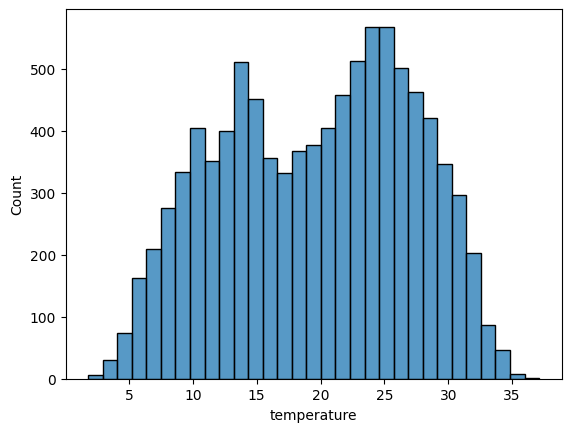

In [ ]:
# visualization
sns.histplot(df_cleaned['temperature'])
plt.show()


In [ ]:
df_cleaned['temperature'].skew()

-0.1361069178515444

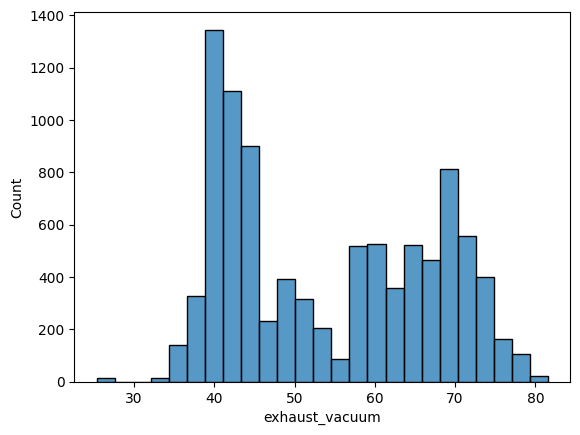

In [ ]:
sns.histplot(df_cleaned['exhaust_vacuum'])
plt.show()

In [ ]:
df_cleaned['exhaust_vacuum'].skew()

0.1968187812768364

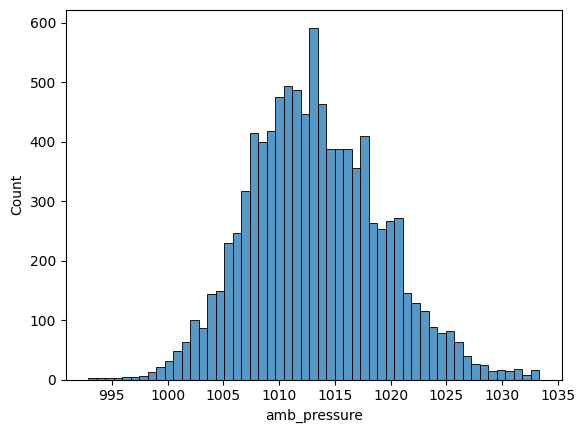

In [ ]:
sns.histplot(df_cleaned['amb_pressure'])
plt.show()


<Axes: >

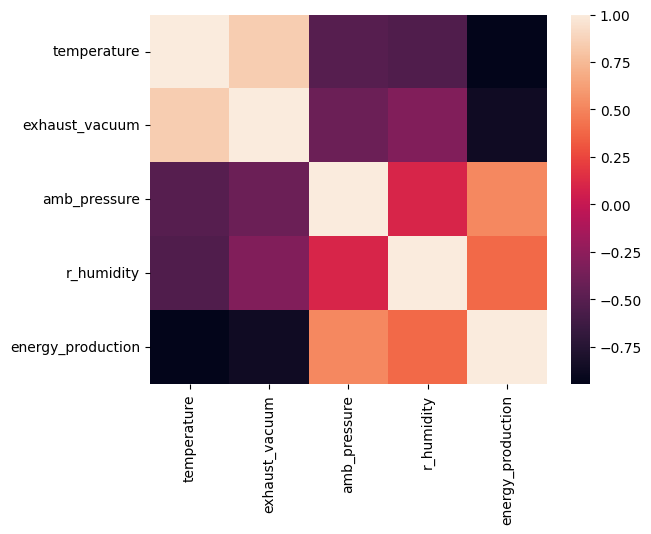

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df_cleaned['amb_pressure'].skew()

0.273845628693525

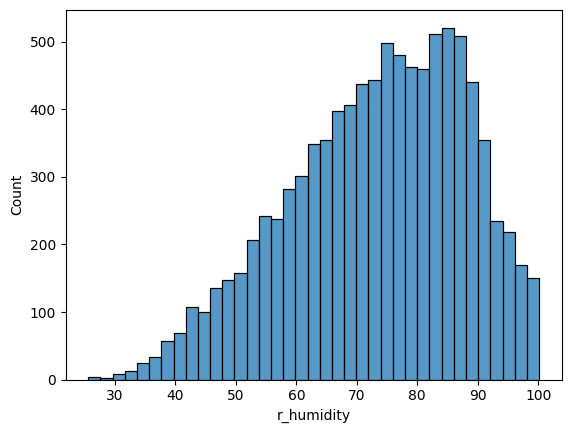

In [ ]:
sns.histplot(df_cleaned['r_humidity'])
plt.show()

In [ ]:
df_cleaned['r_humidity'].skew()

-0.43513848893895307

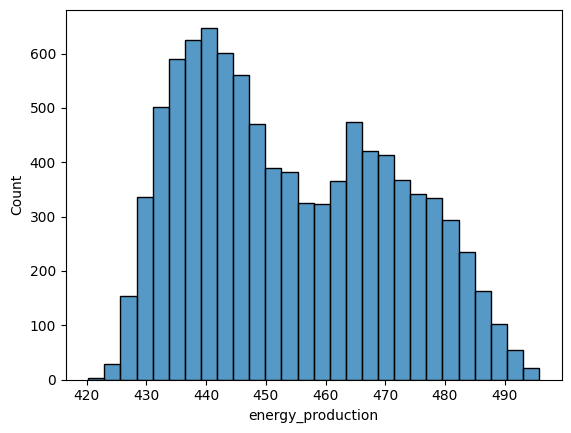

In [ ]:
sns.histplot(df_cleaned['energy_production'])
plt.show()

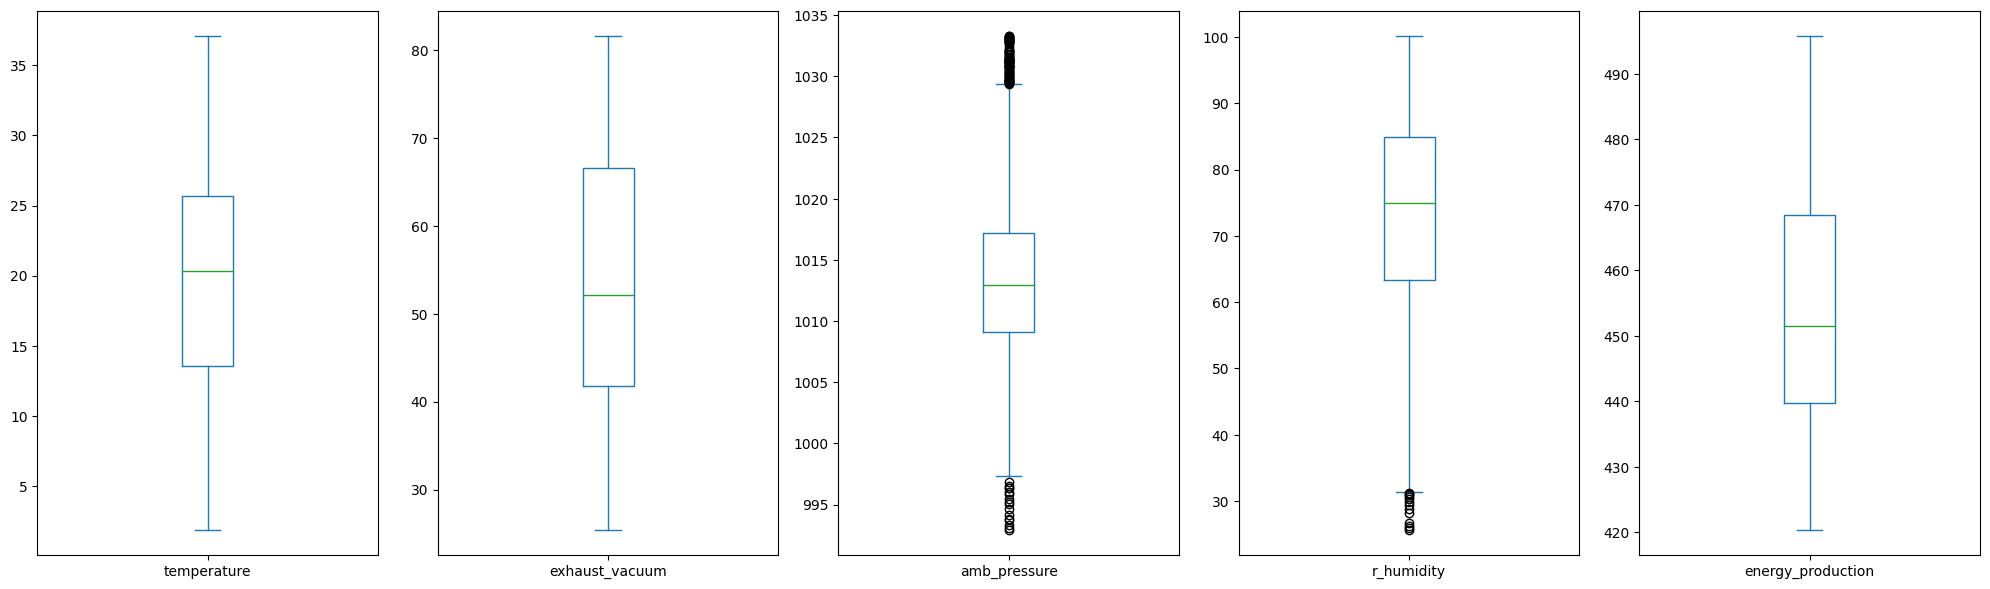

In [ ]:
# outliers
df_cleaned.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

In [ ]:
df_cleaned.drop(df_cleaned.index[df_cleaned['amb_pressure']>1029], inplace=True)
df_cleaned.drop(df_cleaned.index[df_cleaned['amb_pressure']<997], inplace=True)
df_cleaned.drop(df_cleaned.index[df_cleaned['r_humidity']<31], inplace=True)

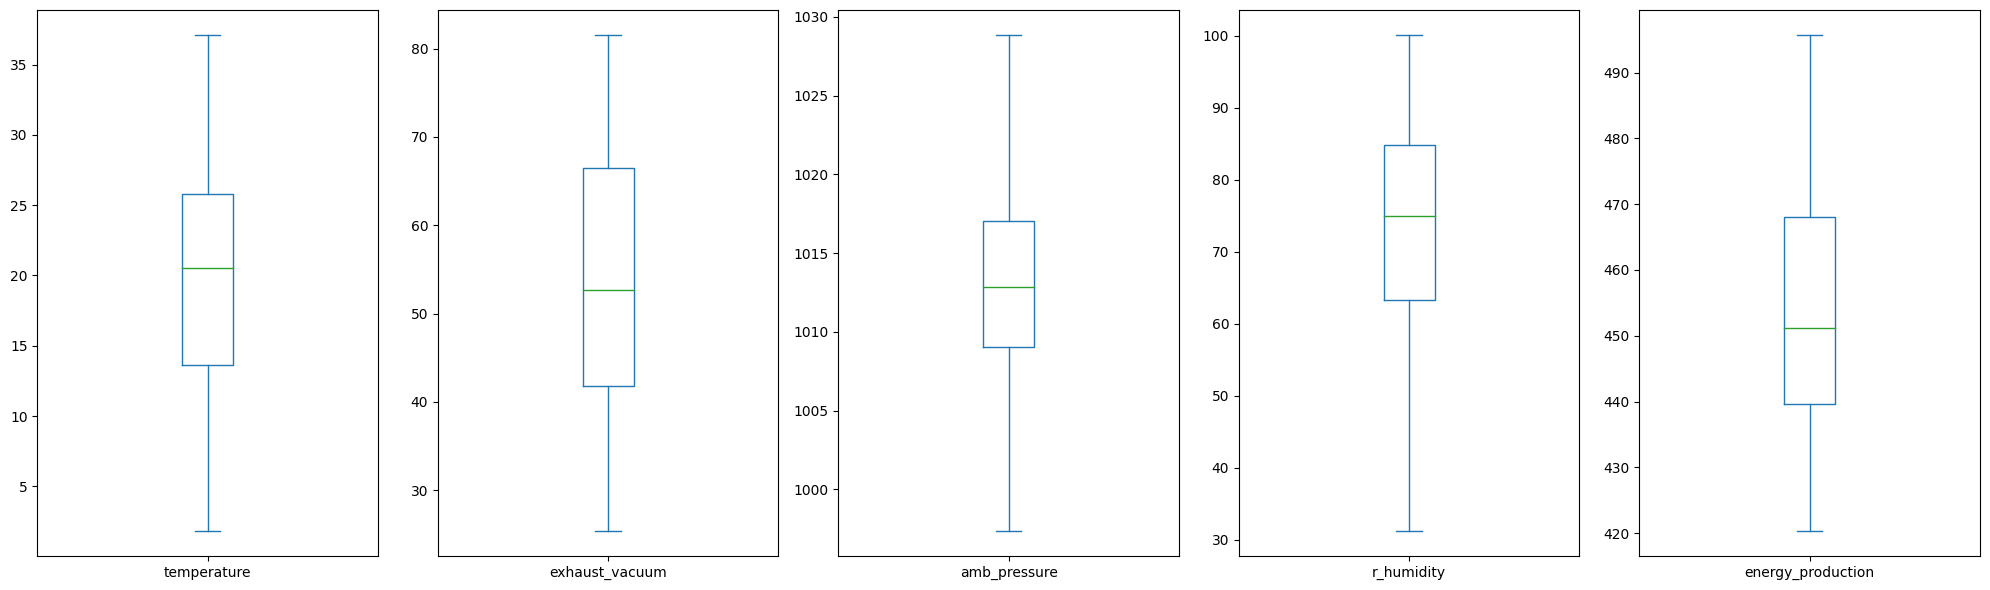

In [ ]:
df_cleaned.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

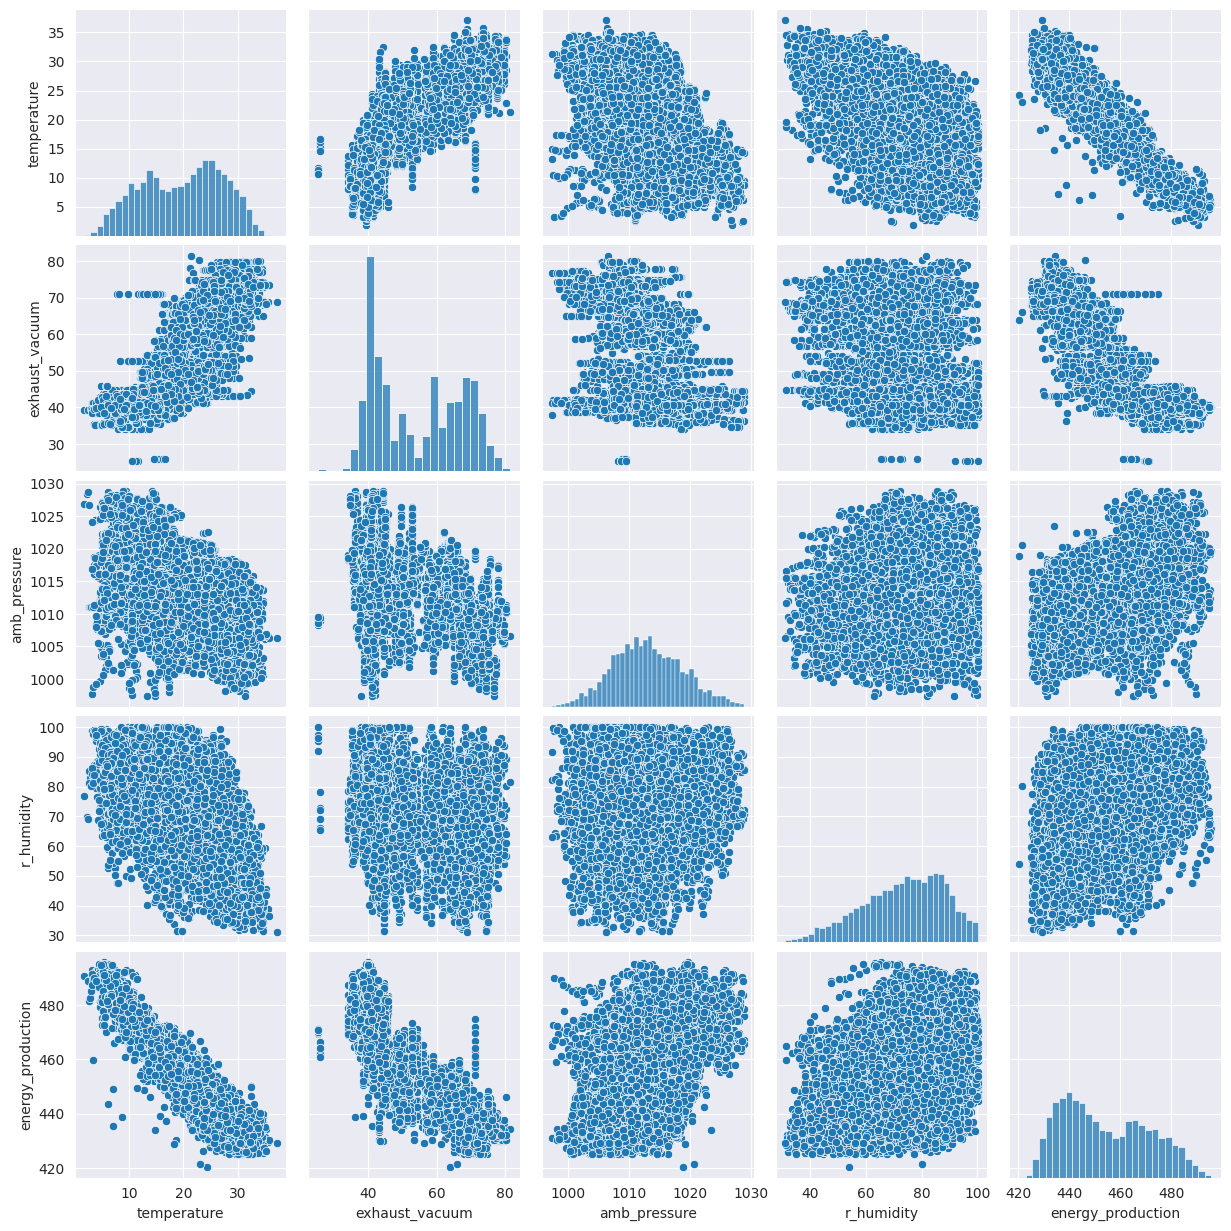

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df_cleaned)

In [ ]:
# correlation
corr_matrix=df_cleaned.corr()
corr_matrix

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.842231     -0.509005   -0.543672   
exhaust_vacuum        0.842231        1.000000     -0.417355   -0.310233   
amb_pressure         -0.509005       -0.417355      1.000000    0.107419   
r_humidity           -0.543672       -0.310233      0.107419    1.000000   
energy_production    -0.947242       -0.868760      0.521276    0.389424   

                   energy_production  
temperature                -0.947242  
exhaust_vacuum             -0.868760  
amb_pressure                0.521276  
r_humidity                  0.389424  
energy_production           1.000000

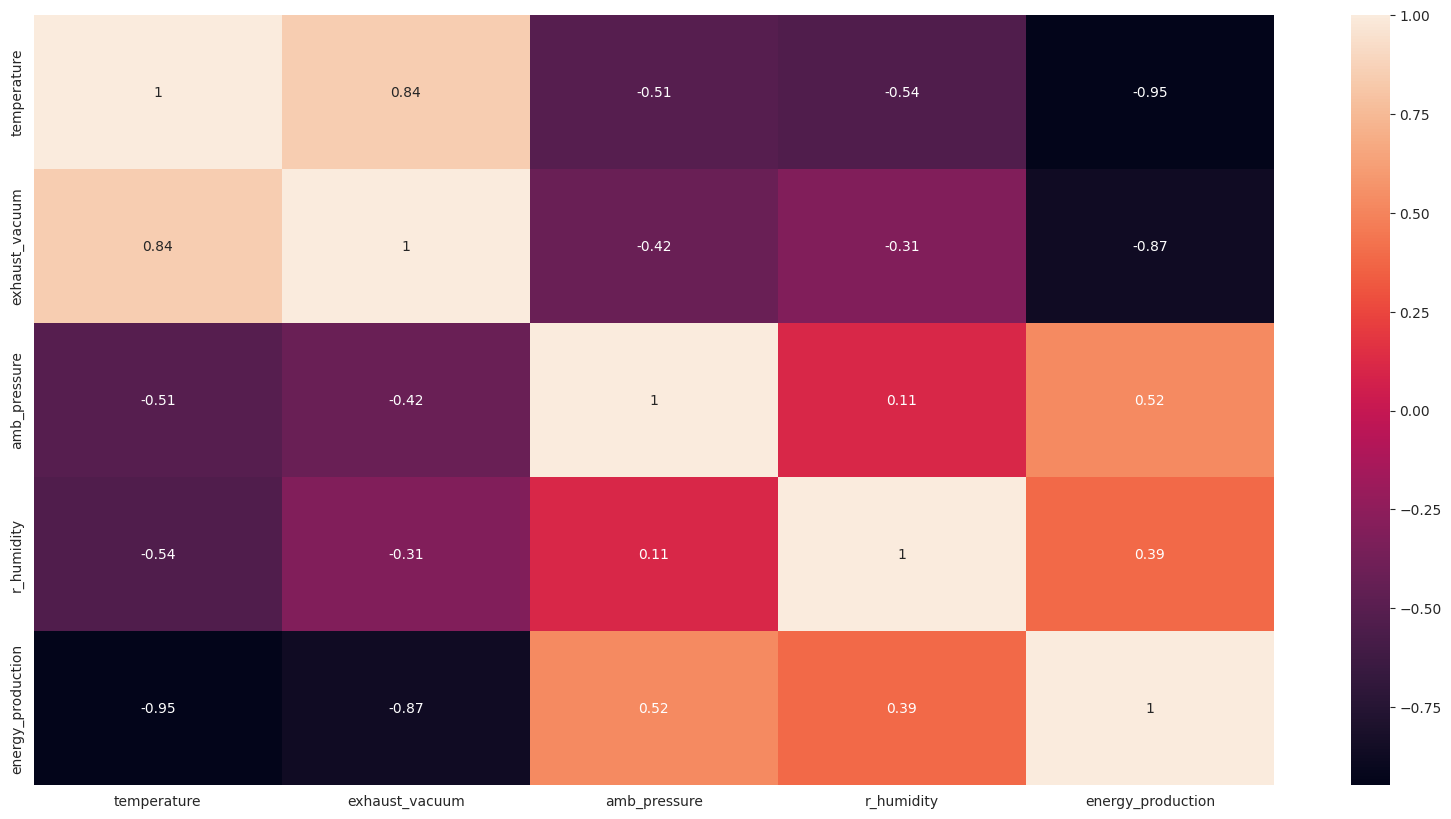

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()


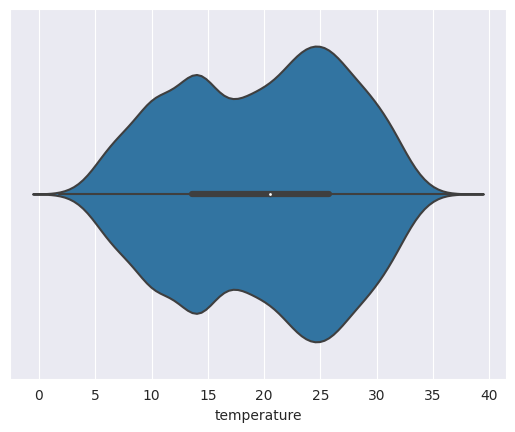

In [ ]:
#observe the distribution of numeric data
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['temperature'])
plt.show()


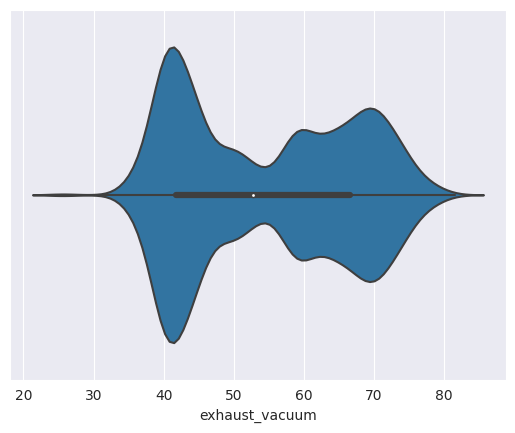

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['exhaust_vacuum'])
plt.show()

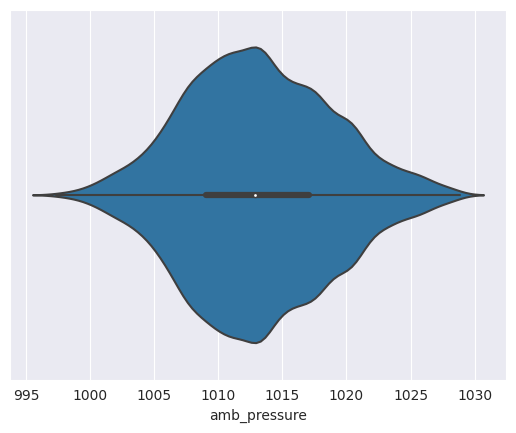

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['amb_pressure'])
plt.show()

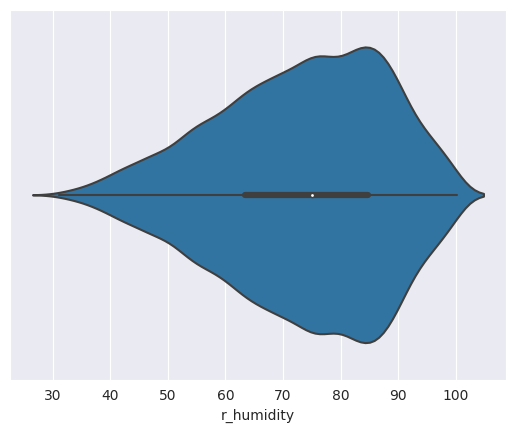

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=df_cleaned['r_humidity'])
plt.show()

<ipython-input-39-309fc62010ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['temperature'])


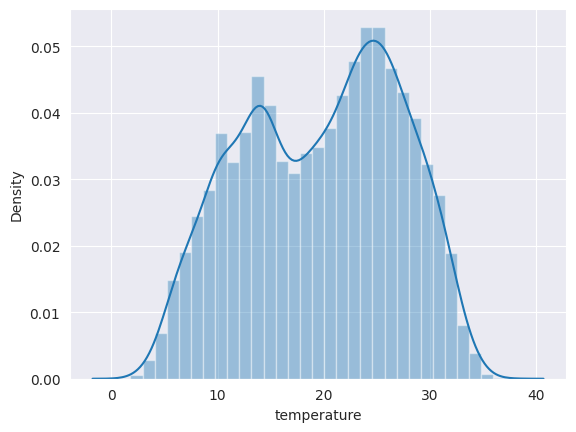

In [ ]:
# normal distribution
sns.distplot(df_cleaned['temperature'])
plt.show()

<ipython-input-40-a56295c184ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['exhaust_vacuum'])


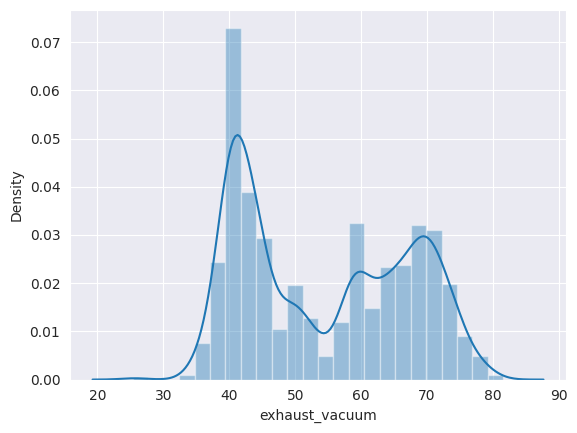

In [ ]:
sns.distplot(df_cleaned['exhaust_vacuum'])
plt.show()

<ipython-input-36-a56295c184ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['exhaust_vacuum'])


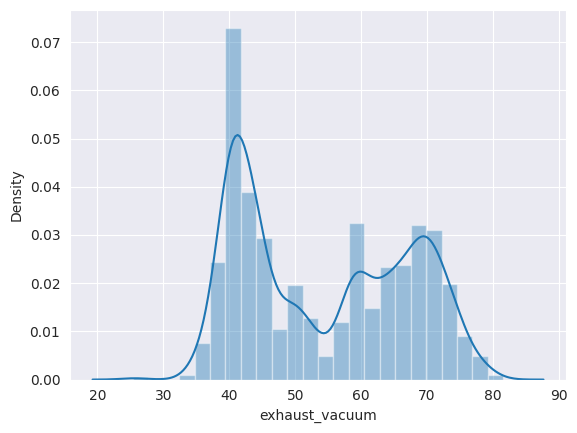

In [ ]:
sns.distplot(df_cleaned['exhaust_vacuum'])
plt.show()

<ipython-input-37-558db2e6a94c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['amb_pressure'])


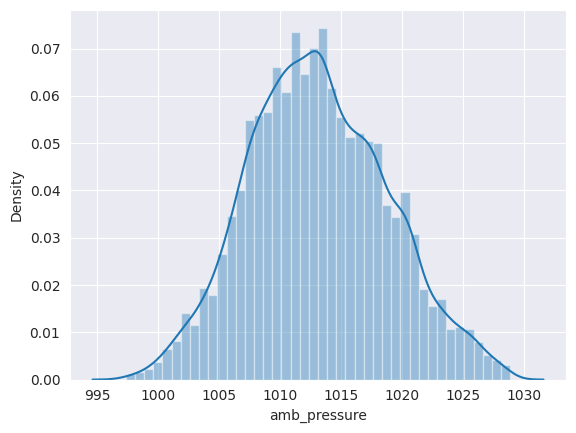

In [ ]:
sns.distplot(df_cleaned['amb_pressure'])
plt.show()

<ipython-input-38-0211106044fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['r_humidity'])


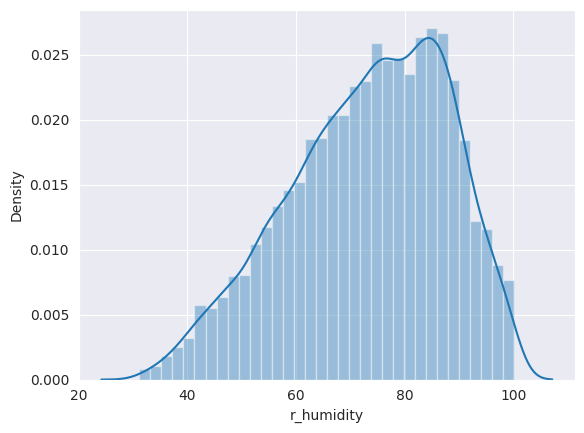

In [ ]:
sns.distplot(df_cleaned['r_humidity'])
plt.show()

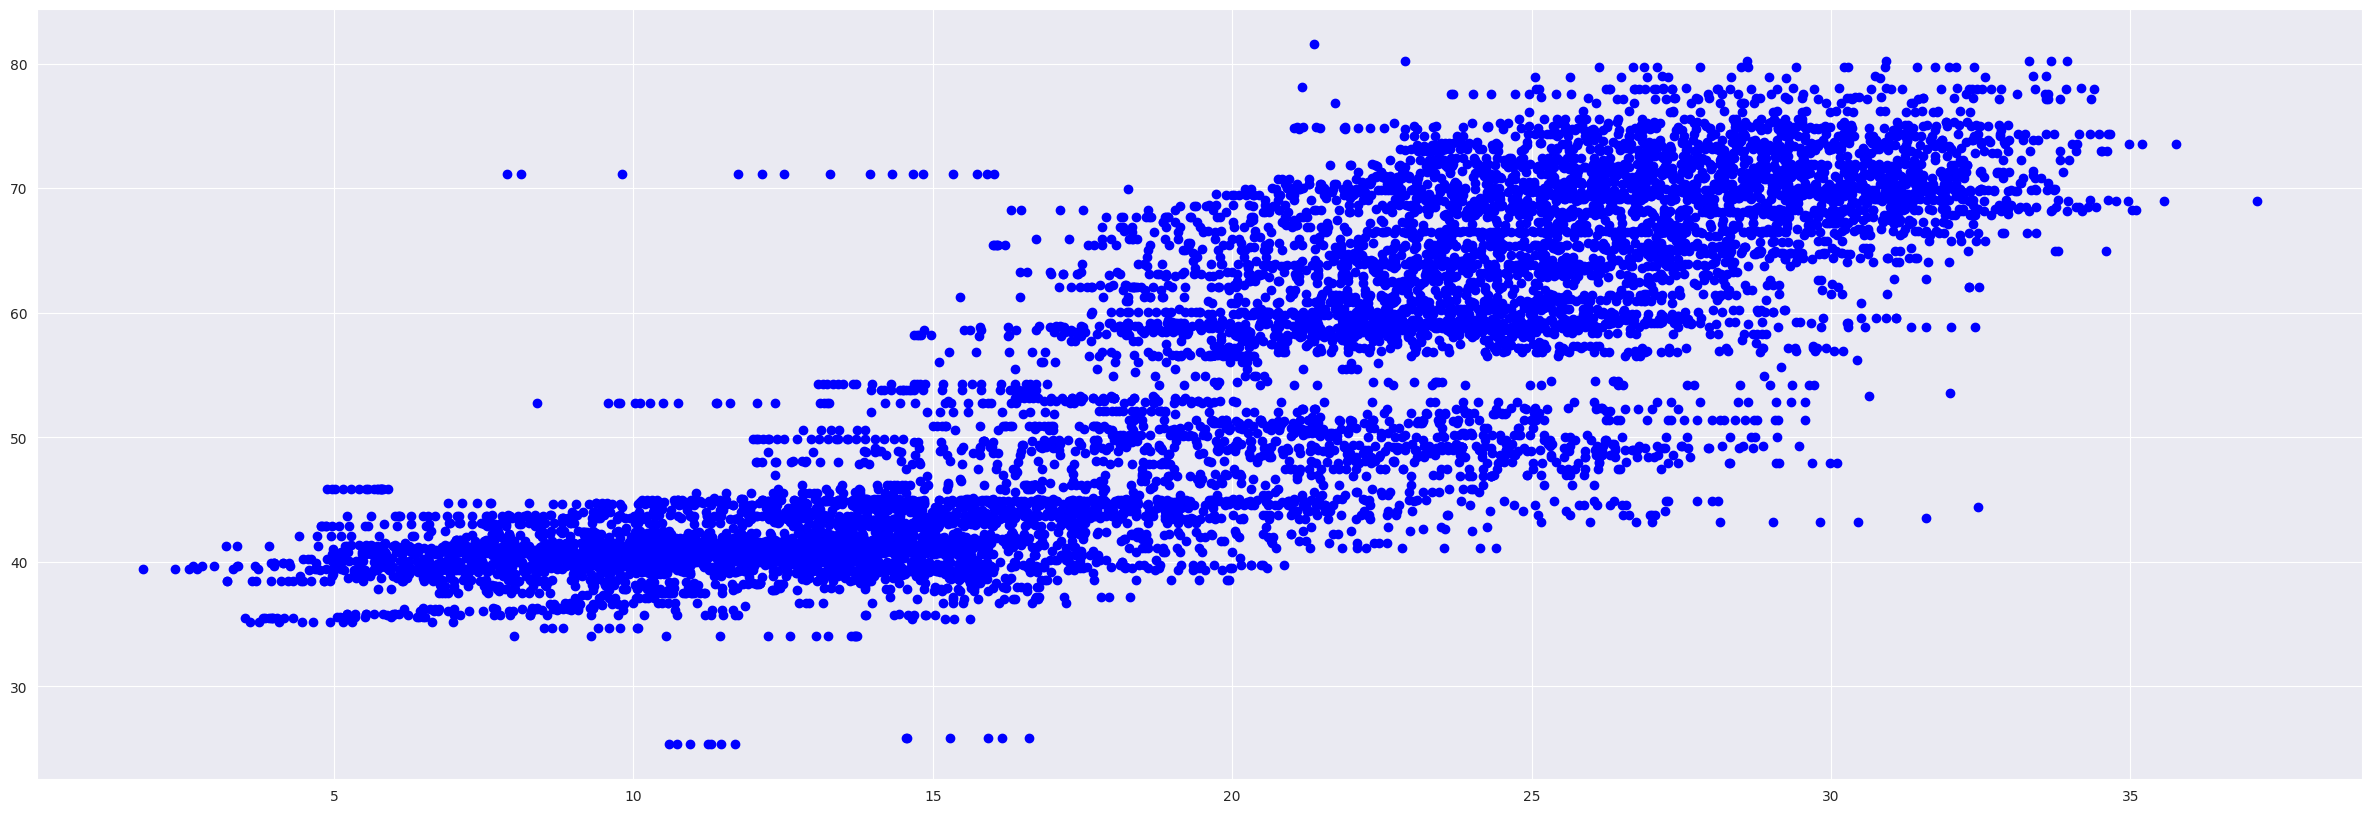

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

In [ ]:
#positive correlation on independent features
import matplotlib.pyplot as pl
plt.figure(figsize=(30,10))
plt.scatter(df_cleaned["temperature"],df_cleaned["exhaust_vacuum"],color = "blue")
plt.show()
plt.figure(figsize=(20,7))

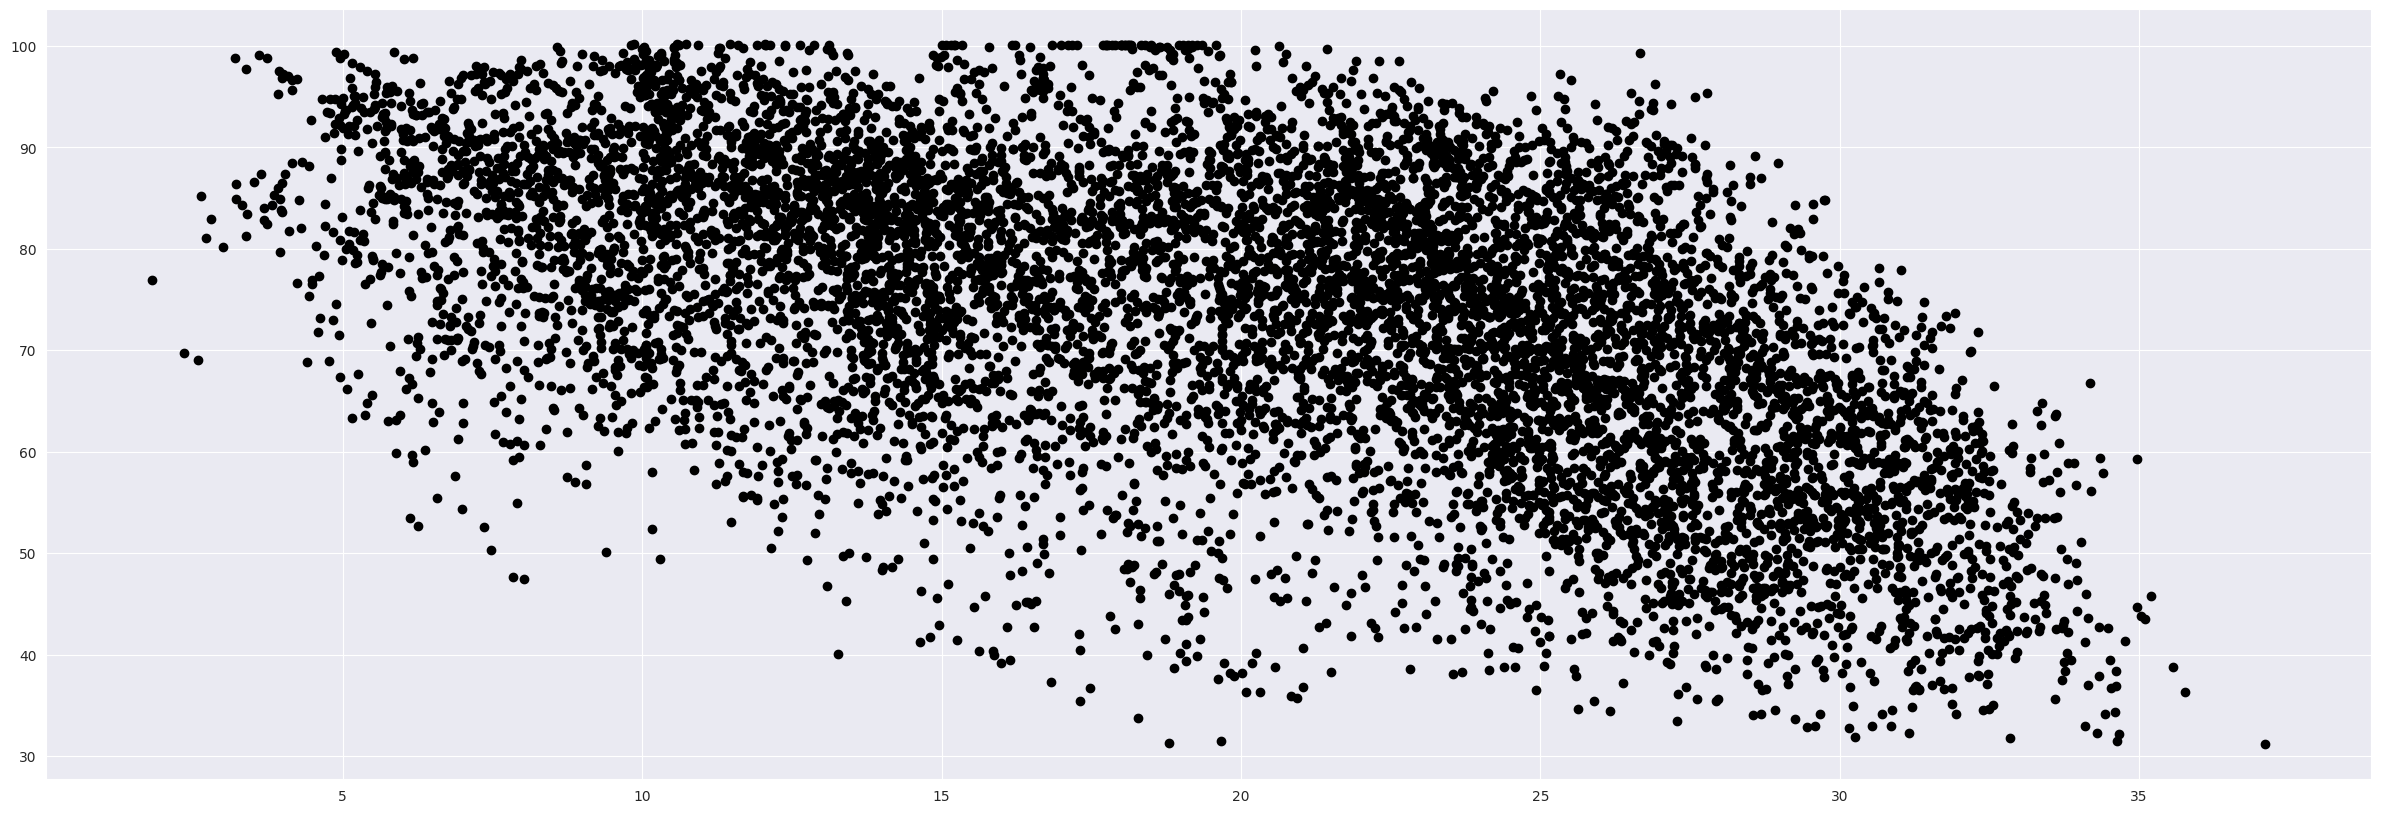

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

In [ ]:
# negative  correlation on independent features
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.scatter(df_cleaned["temperature"],df_cleaned["r_humidity"],color = "black")
plt.show()
plt.figure(figsize=(20,7))

In [ ]:
!pip install klib

In [ ]:
import klib

<Axes: xlabel='temperature', ylabel='Density'>

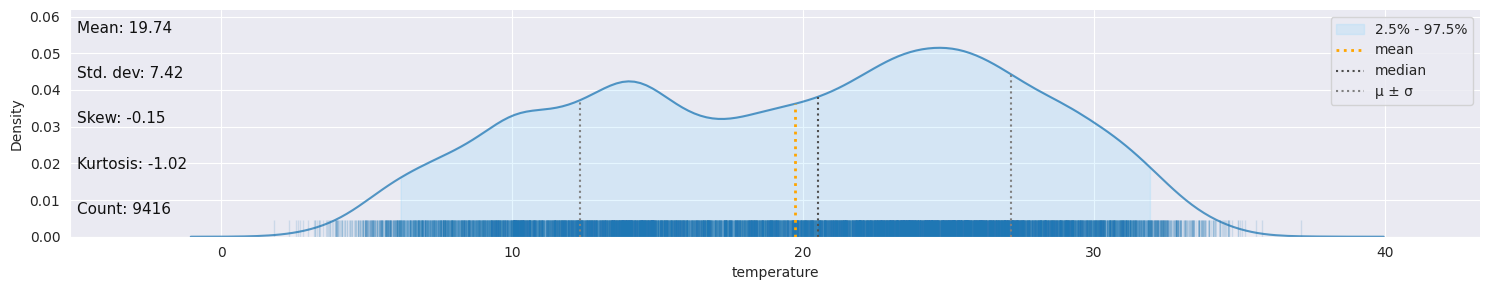

In [ ]:
klib.dist_plot(df_cleaned)

In [ ]:
#correlation matrix
klib.corr_mat(df_cleaned)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

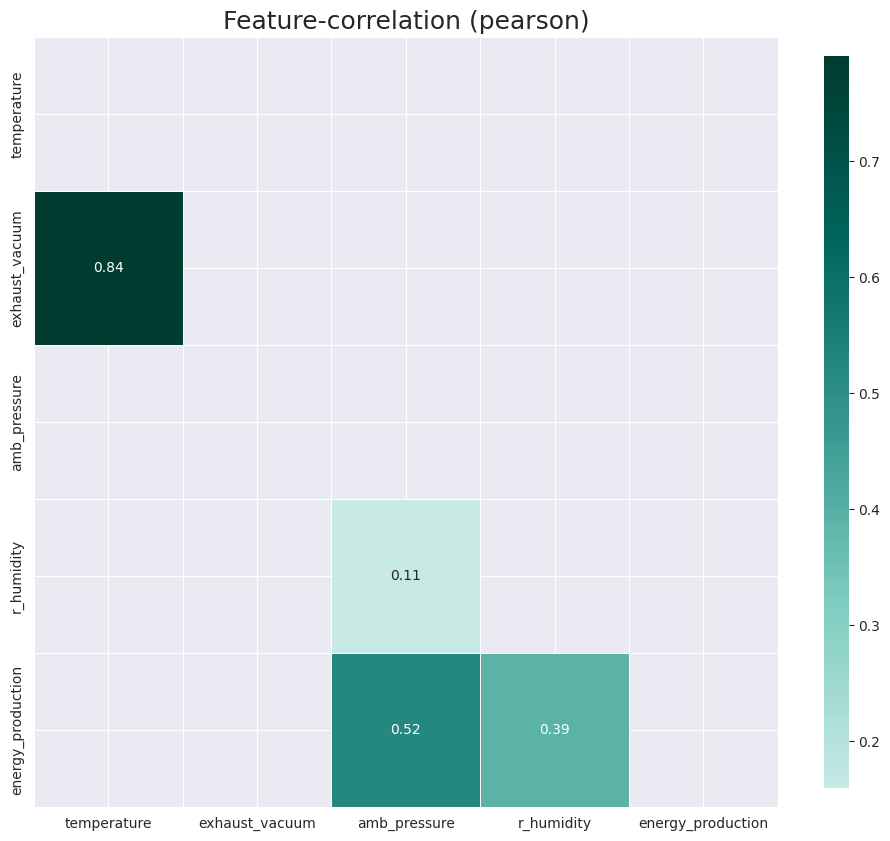

In [ ]:

# positive Correlation
klib.corr_plot(df_cleaned,split="pos")

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

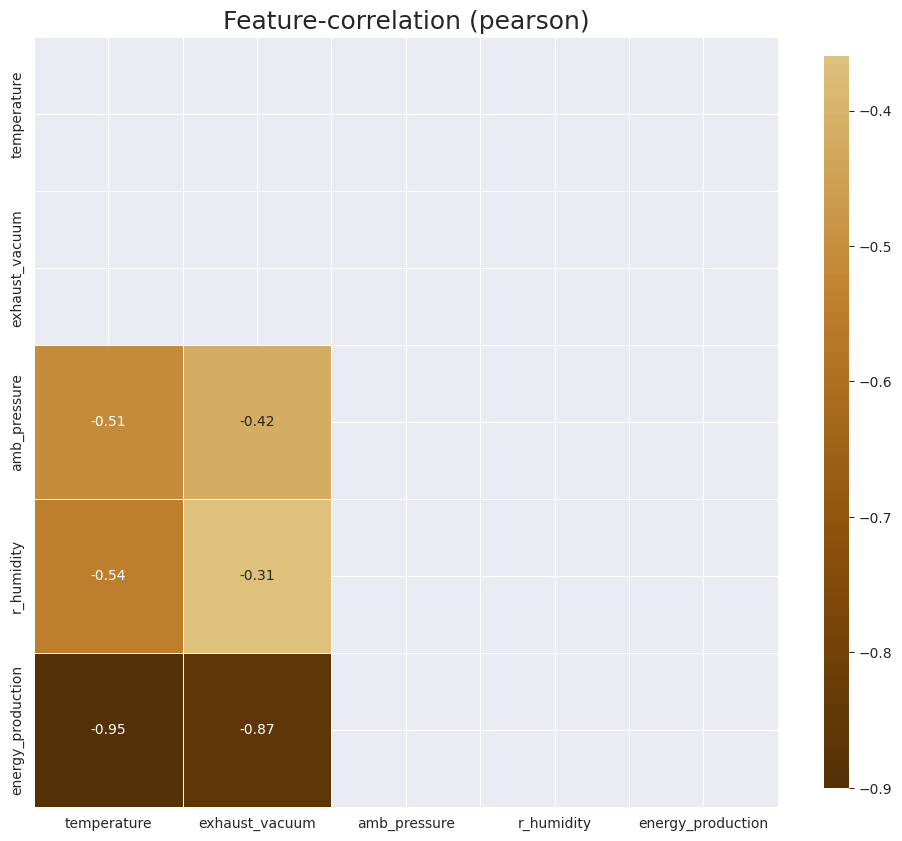

In [ ]:
# negative Correlation
klib.corr_plot(df_cleaned,split="neg")

<Axes: title={'center': 'Feature-correlation (pearson)'}>

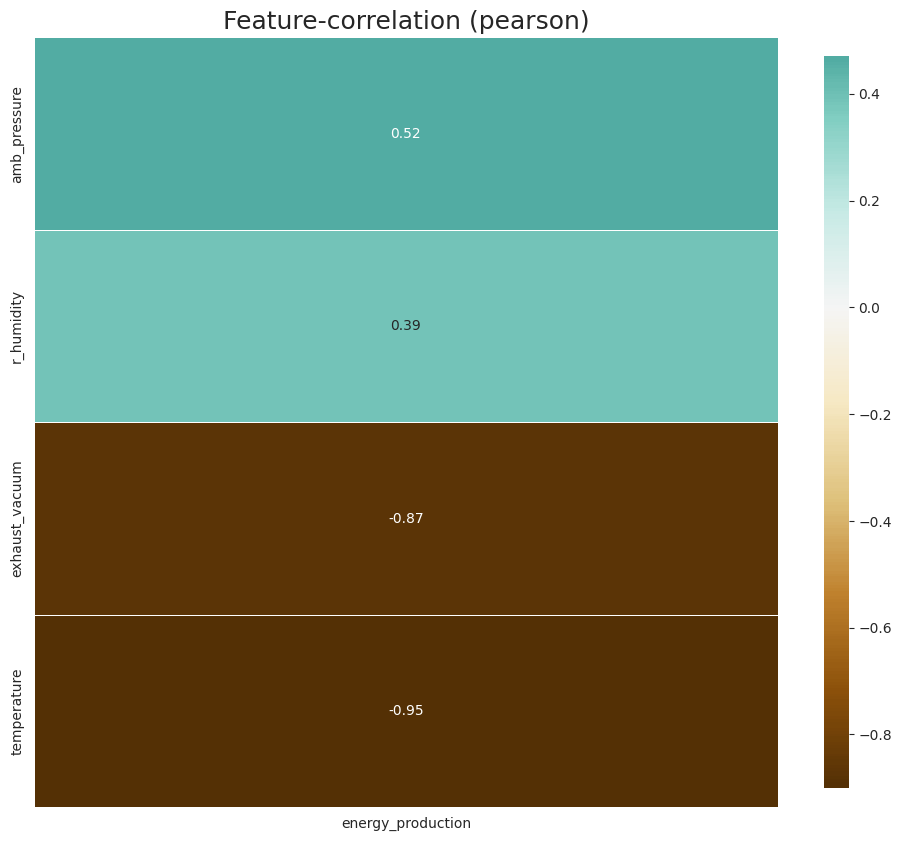

In [ ]:
# correlation with a target variable
klib.corr_plot(df_cleaned,target='energy_production')

In [ ]:

#normalizing the data:
from sklearn import preprocessing
df_norm=preprocessing.normalize(df_cleaned)
print(df_norm)

[[0.0085059  0.03420099 0.90204217 0.053306   0.42689147]
 [0.01069519 0.03761084 0.90582255 0.08409585 0.4133817 ]
 [0.01228345 0.03992343 0.90723954 0.07234572 0.41223508]
 ...
 [0.02776475 0.0512973  0.91684797 0.0512973  0.39160707]
 [0.02073247 0.05953824 0.91998976 0.07237434 0.38000811]
 [0.01584166 0.04395503 0.91110523 0.05682471 0.40555544]]


In [ ]:
df_norm=pd.DataFrame(df_norm)
print(df_norm)

             0         1         2         3         4
0     0.008506  0.034201  0.902042  0.053306  0.426891
1     0.010695  0.037611  0.905823  0.084096  0.413382
2     0.012283  0.039923  0.907240  0.072346  0.412235
3     0.012205  0.048305  0.905506  0.070349  0.415484
4     0.013427  0.044025  0.907975  0.066516  0.411142
...        ...       ...       ...       ...       ...
9411  0.015421  0.044810  0.906771  0.073784  0.412404
9412  0.022222  0.058713  0.912432  0.047445  0.401592
9413  0.027765  0.051297  0.916848  0.051297  0.391607
9414  0.020732  0.059538  0.919990  0.072374  0.380008
9415  0.015842  0.043955  0.911105  0.056825  0.405555

[9416 rows x 5 columns]


0         1         2         3         4
0  1.000000  0.851161  0.941456 -0.509108 -0.932302
1  0.851161  1.000000  0.827240 -0.283571 -0.879679
2  0.941456  0.827240  1.000000 -0.488616 -0.983694
3 -0.509108 -0.283571 -0.488616  1.000000  0.343622
4 -0.932302 -0.879679 -0.983694  0.343622  1.000000

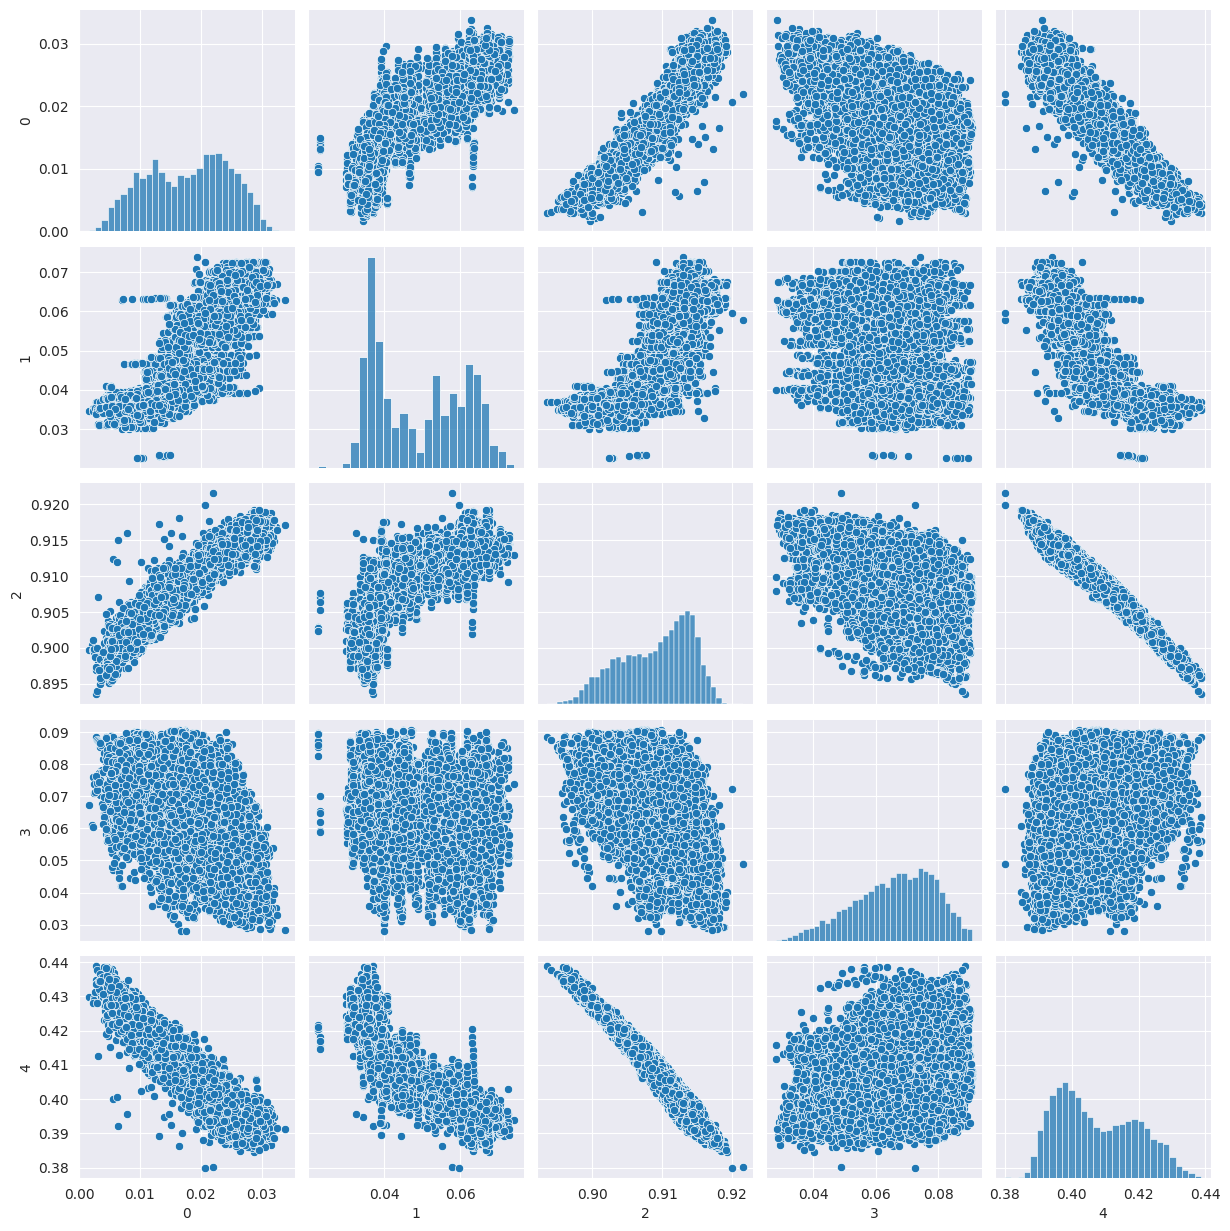

In [ ]:
sns.pairplot(df_norm)
df_norm.corr()


In [ ]:
df_norm.columns = df.columns
df_norm.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0     0.008506        0.034201      0.902042    0.053306           0.426891
1     0.010695        0.037611      0.905823    0.084096           0.413382
2     0.012283        0.039923      0.907240    0.072346           0.412235
3     0.012205        0.048305      0.905506    0.070349           0.415484
4     0.013427        0.044025      0.907975    0.066516           0.411142

In [ ]:
x=df_norm.iloc[:,0:4]
y=df_norm.iloc[:,4]


In [ ]:
x

temperature  exhaust_vacuum  amb_pressure  r_humidity
0        0.008506        0.034201      0.902042    0.053306
1        0.010695        0.037611      0.905823    0.084096
2        0.012283        0.039923      0.907240    0.072346
3        0.012205        0.048305      0.905506    0.070349
4        0.013427        0.044025      0.907975    0.066516
...           ...             ...           ...         ...
9411     0.015421        0.044810      0.906771    0.073784
9412     0.022222        0.058713      0.912432    0.047445
9413     0.027765        0.051297      0.916848    0.051297
9414     0.020732        0.059538      0.919990    0.072374
9415     0.015842        0.043955      0.911105    0.056825

[9416 rows x 4 columns]

In [ ]:
y

0       0.426891
1       0.413382
2       0.412235
3       0.415484
4       0.411142
          ...   
9411    0.412404
9412    0.401592
9413    0.391607
9414    0.380008
9415    0.405555
Name: energy_production, Length: 9416, dtype: float64

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(7532, 4)
(1884, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(7532,)
(1884,)


In [ ]:
df.describe()

#model Building

In [ ]:
import statsmodels.formula.api as smf


In [ ]:
model = smf.ols(formula='energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=df).fit()
model


In [ ]:
model.params


Intercept         454.609274
temperature        -1.977513
exhaust_vacuum     -0.233916
amb_pressure        0.062083
r_humidity         -0.158054
dtype: float64

In [ ]:
np.round(model.pvalues,4),np.round(model.tvalues,4)


(Intercept         0.0
 temperature       0.0
 exhaust_vacuum    0.0
 amb_pressure      0.0
 r_humidity        0.0
 dtype: float64,
 Intercept          46.6337
 temperature      -129.3420
 exhaust_vacuum    -32.1221
 amb_pressure        6.5641
 r_humidity        -37.9185
 dtype: float64)

In [ ]:
#Finding R-Squared values
print('Rsquared value:',model.rsquared) , print('Rsquared adj value:',model.rsquared_adj)
#model accuracy is 92%


Rsquared value: 0.9286960898122537
Rsquared adj value: 0.9286662648994909


(None, None)

In [ ]:
slr_exh=smf.ols(formula='energy_production~exhaust_vacuum', data=df).fit()
slr_exh.tvalues , slr_exh.pvalues


(Intercept         1370.218159
 exhaust_vacuum    -172.401540
 dtype: float64,
 Intercept         0.0
 exhaust_vacuum    0.0
 dtype: float64)

In [ ]:
slr_amb=smf.ols(formula='energy_production~amb_pressure', data=df).fit()
slr_amb.tvalues , slr_amb.pvalues


(Intercept      -41.448628
 amb_pressure    59.296232
 dtype: float64,
 Intercept       0.0
 amb_pressure    0.0
 dtype: float64)

In [ ]:
slr_r_hum=smf.ols(formula='energy_production~r_humidity', data=df).fit()
slr_r_hum.tvalues , slr_r_hum.pvalues


(Intercept     511.676167
 r_humidity     41.398730
 dtype: float64,
 Intercept     0.0
 r_humidity    0.0
 dtype: float64)

In [ ]:
slr_tmp=smf.ols(formula='energy_production~temperature', data=df).fit()
slr_tmp.tvalues , slr_tmp.pvalues


(Intercept      3177.280433
 temperature    -291.715195
 dtype: float64,
 Intercept      0.0
 temperature    0.0
 dtype: float64)

In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:58:24   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        454.6093      9.749     46.634      0.000     435.500     473.718
temperature       -1.9775      0.015   -129.342      0.000      -2.007      -1.948
exhaust_vacuum    -0.2339      0.007    -32.122      0.000      -0.248      -0.220
amb_pressure       0.0621      0.009      6.564      0.000       0.044       0.081
r_humidity        -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
  model1 = smf.ols(formula='energy_production~temperature+amb_pressure+r_humidity',data=df).fit()
model1


In [ ]:
print('Rsquared value:',model1.rsquared) , print('Rsquared adj value:',model1.rsquared_adj)


Rsquared value: 0.9210025307676984
Rsquared adj value: 0.9209777511349405


(None, None)

In [ ]:
model2 = smf.ols(formula='energy_production~exhaust_vacuum+amb_pressure+r_humidity',data=df).fit()
model2


In [ ]:
print('Rsquared value:',model2.rsquared) , print('Rsquared adj value:',model2.rsquared_adj)


Rsquared value: 0.8039581703127989
Rsquared adj value: 0.8038966766397477


(None, None)

Splitting the data into Independent(X) & Dependent Variables(Y)


In [ ]:
X=df.iloc[:,0:4]
X


temperature  exhaust_vacuum  amb_pressure  r_humidity
0            9.59           38.56       1017.01       60.10
1           12.04           42.34       1019.72       94.67
2           13.87           45.08       1024.42       81.69
3           13.72           54.30       1017.89       79.08
4           15.14           49.64       1023.78       75.00
...           ...             ...           ...         ...
9563        17.10           49.69       1005.53       81.82
9564        24.73           65.34       1015.42       52.80
9565        30.44           56.24       1005.19       56.24
9566        23.00           66.05       1020.61       80.29
9567        17.75           49.25       1020.86       63.67

[9568 rows x 4 columns]

In [ ]:
Y=df.energy_production
Y


0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9568, dtype: float64

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scale= StandardScaler().fit_transform(X)
x_scale
type(x_scale)


numpy.ndarray

#AFTER REMOVING OUTLIERS
#Model Building
Splitting the data into train and test parts


In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RepeatedKFold
x_train,x_test,y_train,y_test= train_test_split(x_scale,Y,test_size=0.2,random_state=10)


#Models

In [ ]:
x_test.shape


(1914, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score



In [ ]:
# selecting best models
model_selc = [LinearRegression(),
             DecisionTreeRegressor(),
             RandomForestRegressor(n_estimators = 10),
             GradientBoostingRegressor(),
             SVR(kernel='poly'),
             xgb.XGBRegressor(),
             Ridge(alpha=4),
             Lasso(alpha=4),
             KNeighborsRegressor(),
             AdaBoostRegressor(),
              ]


In [ ]:
kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state= None)
cv_results = []
cv_results_mean =[]
for ele in model_selc:
    cross_results = cross_val_score(ele,x_train,y_train, cv=kfold, scoring ='r2')

    cv_results.append(cross_results)

    cv_results_mean.append(cross_results.mean())
    print("\n MODEL: ",ele,"\nMEAN R2:",cross_results.mean())



 MODEL:  LinearRegression() 
MEAN R2: 0.9305813192772188

 MODEL:  DecisionTreeRegressor() 
MEAN R2: 0.9284117140356752

 MODEL:  RandomForestRegressor(n_estimators=10) 
MEAN R2: 0.9569325849379164

 MODEL:  GradientBoostingRegressor() 
MEAN R2: 0.9490550737847083

 MODEL:  SVR(kernel='poly') 
MEAN R2: 0.7842983483569923

 MODEL:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, nu

#Model Fitting

1) LINEAR REGRESSION.


In [ ]:
# regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

#for predict the test values
y_predict_li=reg.predict(x_test)
y_predict_li


array([428.80831535, 459.75461068, 450.61336386, ..., 452.1657498 ,
       453.57345604, 475.68092194])

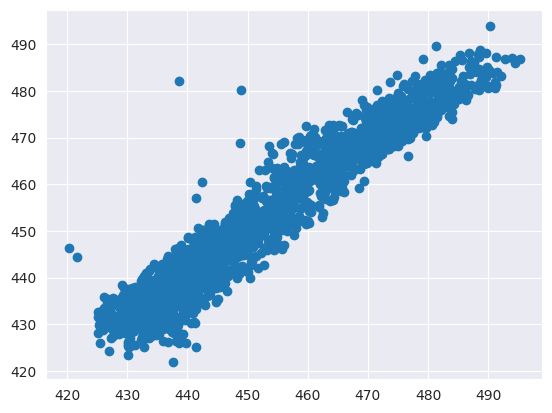

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_li)
plt.show()

(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

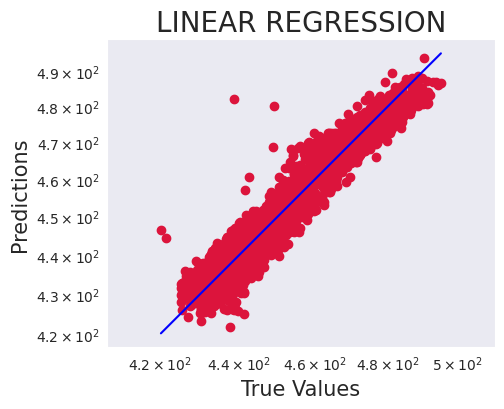

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_li, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_li), max(y_test))
p2 = min(min(y_predict_li), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LINEAR REGRESSION',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing Accuracy
test_data_model_score=reg.score(x_test,y_test)
print ('Accuracy of test data: ',test_data_model_score)
#score of test data  0.9266343475459896

#training Accuracy
train_data_model_score=reg.score(x_train,y_train)
print ('Accuracy of train data: ',train_data_model_score)
#score of train data 0.9292095855394127


Accuracy of test data:  0.9198969303303213
Accuracy of train data:  0.9307435673202328


Mean Absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error
mae1=mean_absolute_error(y_test, y_predict_li)
print("Mean Absolute Error:",round(mae1,4))
#3.6875061540109905


Mean Absolute Error: 3.6875


Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test, y_predict_li)
print("Mean Squared Error:",round(mse1,4))


Mean Squared Error: 22.1685


Root Mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
rmse1=np.sqrt(mean_squared_error(y_test, y_predict_li))
print("Root Mean Squared:",round(rmse1,4))
#4.740305428732748


Root Mean Squared: 4.7083


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle1=np.sqrt(mean_squared_log_error(y_test, y_predict_li))
print("Root Mean Squared log Error:",round(rmsle1,4))
#0.010457731810532257


Root Mean Squared log Error: 0.0104


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score1= r2_score(y_predict_li,y_test)*100
print("Linear Regression R-Squared :",round(r2score1,4))
#91.01476010770673


Linear Regression R-Squared : 91.5711


#2)DECISION TREE REGRESSOR.


In [ ]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(x_train,y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
#for predict the test values
y_predict_dt=DTR.predict(x_test)
y_predict_dt


array([425.75, 464.36, 445.46, ..., 450.25, 451.93, 478.75])

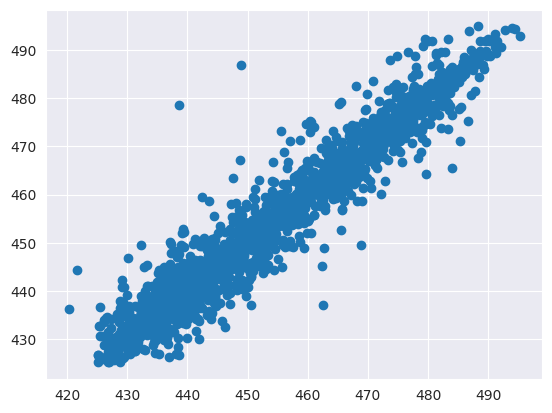

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_dt)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

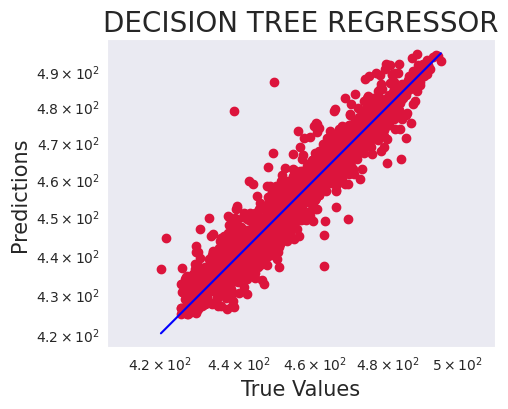

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_dt, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_dt), max(y_test))
p2 = min(min(y_predict_dt), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('DECISION TREE REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing Accuracy
test_data_model_score=DTR.score(x_test,y_test)
print ('Accuarcy of test data',round(test_data_model_score,4))
#score of test data  0.9266432610903093

#Training Accuarcy
train_data_model_score=DTR.score(x_train,y_train)
print ('Accuracy of train data',train_data_model_score)
#score of train data 1.0


Accuarcy of test data 0.9248
Accuracy of train data 1.0


Mean Absolute Error


In [ ]:
from sklearn.metrics import mean_absolute_error
mae2=mean_absolute_error(y_test, y_predict_dt)
print("Mean Absolute Error:",round(mae2,4))


Mean Absolute Error: 3.1587


Mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y_test, y_predict_dt)
print("Mean Squared Error:",round(mse2,4))


Mean Squared Error: 20.8209


Root mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
rmse2=np.sqrt(mean_squared_error(y_test, y_predict_dt))
print("Root Mean Squared Error:",round(rmse2,4))


Root Mean Squared Error: 4.563


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle2=np.sqrt(mean_squared_log_error(y_test, y_predict_dt))
print("Root Mean Squared log Error:",round(rmsle2,4))


Root Mean Squared log Error: 0.01


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score2= r2_score(y_predict_dt,y_test)*100
print("Decision Tree Regressor R-Squared:",round(r2score2,4))


Decision Tree Regressor R-Squared: 92.5953


#3)Randomforest regressor


In [ ]:
RFR= RandomForestRegressor(n_estimators =50, random_state = 0)
RFR.fit(x_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=0)

In [ ]:
#for predict the test values
y_predict_rfr=RFR.predict(x_test)
y_predict_rfr


array([426.7426, 462.0848, 450.787 , ..., 451.0766, 451.9846, 478.7246])

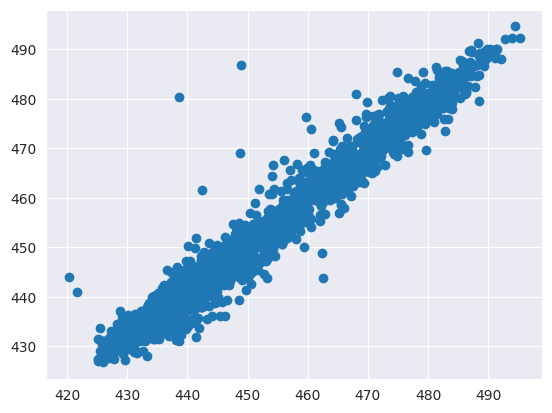

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_rfr)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

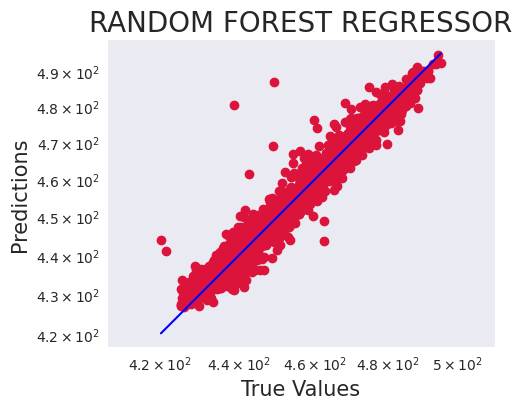

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_rfr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_rfr), max(y_test))
p2 = min(min(y_predict_rfr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('RANDOM FOREST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing Accuracy
test_data_model_score=RFR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9643776538798704

#Training Accuracy
train_data_model_score=RFR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.9942791162212218


Accuracy of test data 0.9555
Accuracy of train data 0.9947


Mean Absolute Error


In [ ]:
from sklearn.metrics import mean_absolute_error
mae3=mean_absolute_error(y_test, y_predict_rfr)
print("Mean Absolute Error:",round(mae3,4))


Mean Absolute Error: 2.4322


Mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
mse3=mean_squared_error(y_test, y_predict_rfr)
print("Mean Squared Error:",round(mse3,4))

Mean Squared Error: 12.3201


Root mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
rmse3=np.sqrt(mean_squared_error(y_test, y_predict_rfr))
print("Root Mean Squared Error:",round(rmse3,4))

Root Mean Squared Error: 3.51


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle3=np.sqrt(mean_squared_log_error(y_test, y_predict_rfr))
print("Root Mean Squared Log Error:",round(rmsle3,4))

Root Mean Squared Log Error: 0.0077


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score3= r2_score(y_predict_rfr,y_test)*100
print("Random Forest Regressor R-Squared:",round(r2score3,4))


Random Forest Regressor R-Squared: 95.4127


#4)GradientBoostingRegressor.


In [ ]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100) # lr = 0.1, est = 100
GBR.fit(x_train,y_train)


GradientBoostingRegressor()

In [ ]:
#for predict the test values
y_predict_gbr=GBR.predict(x_test)
y_predict_gbr

array([430.77116198, 460.13205901, 449.34768295, ..., 451.38220192,
       450.65181313, 477.27223166])

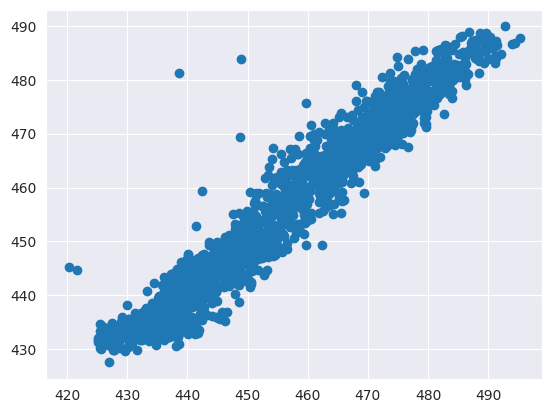

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_gbr)
plt.show()

(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

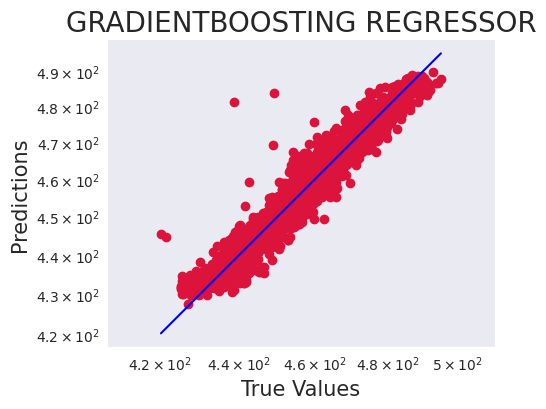

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_gbr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_gbr), max(y_test))
p2 = min(min(y_predict_gbr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('GRADIENTBOOSTING REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing Accuarcy
test_data_model_score=GBR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9526412792412793

#Training Accuracy
train_data_model_score=GBR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.952306441895972


Accuracy of test data 0.9415
Accuracy of train data 0.9544


Mean Absolute Error


In [ ]:
from sklearn.metrics import mean_absolute_error
mae4=mean_absolute_error(y_test, y_predict_gbr)
print("Mean Absolute error:",round(mae4,4))

Mean Absolute error: 3.0174


Mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
mse4=mean_squared_error(y_test, y_predict_gbr)
print("Mean Squared error:",round(mse4,4))


Mean Squared error: 16.2028


Root mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
rmse4=np.sqrt(mean_squared_error(y_test, y_predict_gbr))
print("Root Mean Squared error:",round(rmse4,4))


Root Mean Squared error: 4.0253


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle4=np.sqrt(mean_squared_log_error(y_test, y_predict_gbr))
print("Root Mean Squared log error:",round(rmsle4,4))

Root Mean Squared log error: 0.0088


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score4= r2_score(y_predict_gbr,y_test)*100
print("Gradient Boosting Regressor:",round(r2score4,4))

Gradient Boosting Regressor: 93.828


#5)SUPPORT VECTOR REGRESSOR


In [ ]:
SVR=SVR(kernel='linear')
SVR.fit(x_train,y_train)


SVR(kernel='linear')

In [ ]:
#for predict the test values
y_predict_svr=SVR.predict(x_test)
y_predict_svr


array([428.0392094 , 459.58085021, 450.26878199, ..., 451.91833237,
       453.61633188, 475.84937174])

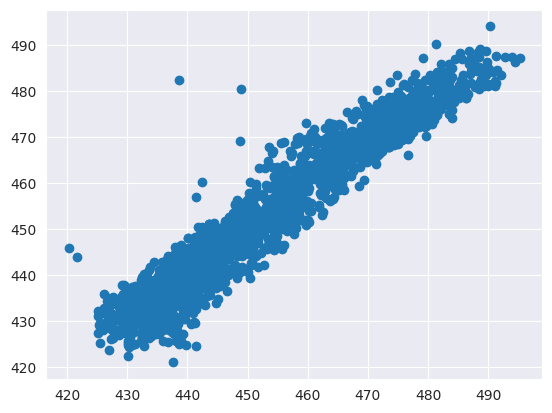

In [ ]:

#plot on prdtion
plt.scatter(y_test, y_predict_svr)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

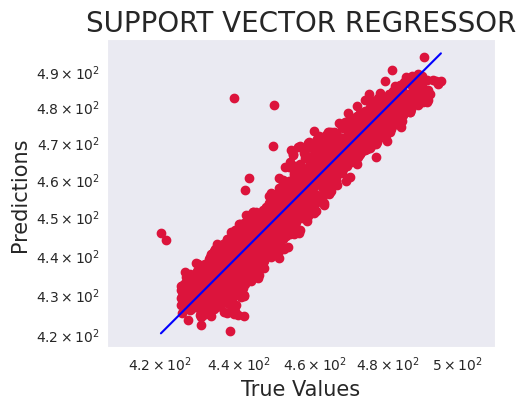

In [ ]:

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_svr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_svr), max(y_test))
p2 = min(min(y_predict_svr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('SUPPORT VECTOR REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing Accuracy
test_data_model_score=SVR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9323981412429594

#Training Accuarcy
train_data_model_score=SVR.score(x_train,y_train)
print ('accuracy of train data',round(train_data_model_score,4))
#score of test data 0.9268129221113746


Accuracy of test data 0.9187
accuracy of train data 0.9302


Mean Absolute Error


In [ ]:
from sklearn.metrics import mean_absolute_error
mae5=mean_absolute_error(y_test, y_predict_svr)
print("Mean Absolute Error:",round(mae5,4))

Mean Absolute Error: 3.6946


Mean squared error


In [ ]:

from sklearn.metrics import mean_squared_error
mse5=mean_squared_error(y_test, y_predict_svr)
print("Mean Squared Error:",round(mse5,4))

Mean Squared Error: 22.4915


Root mean squared error


In [ ]:

from sklearn.metrics import mean_squared_error
rmse5=np.sqrt(mean_squared_error(y_test, y_predict_svr))
print("Root Mean Squared Error:",round(rmse5,4))

Root Mean Squared Error: 4.7425


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle5=np.sqrt(mean_squared_log_error(y_test, y_predict_svr))
print("Root Mean Squared log Error:",round(rmsle5,4))

Root Mean Squared log Error: 0.0105


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score5= r2_score(y_predict_svr,y_test)*100
print("Support Vector Regressor R-Squared:",round(r2score5,4))# 92.21165393596998


Support Vector Regressor R-Squared: 91.7853


#6)XGBOOST


In [ ]:

XGB=xgb.XGBRegressor(n_estimators=100,eta=0.001,gamma=10,learning_rate=0.5)
XGB.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.001, eval_metric=None,
             feature_types=None, gamma=10, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
#for predict the test values
y_predict_xgb=XGB.predict(x_test)
y_predict_xgb


array([430.5687 , 463.45334, 451.55292, ..., 453.23306, 454.6845 ,
       478.63837], dtype=float32)

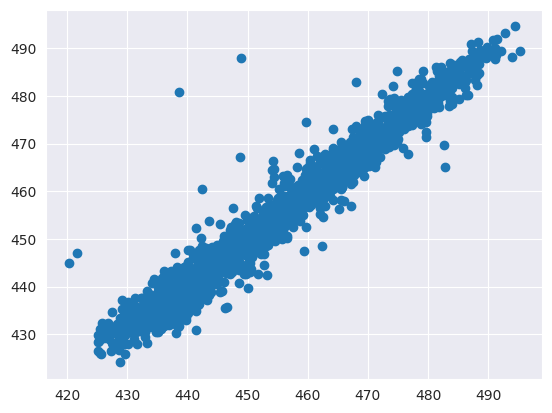

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_xgb)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

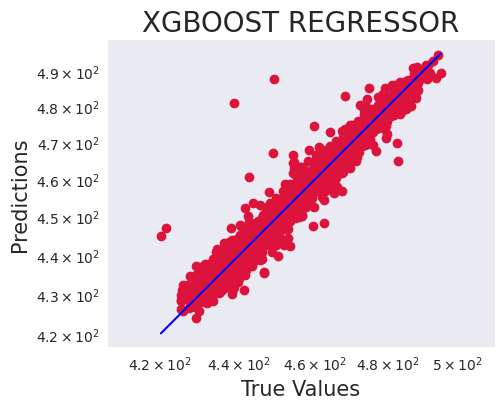

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_xgb, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_xgb), max(y_test))
p2 = min(min(y_predict_xgb), min(y_test))
plt.title('XGBOOST REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:

#testing Accuaracy
test_data_model_score=XGB.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9665988364354935

#Training Accuaracy
train_data_model_score=XGB.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.9859995156739711

Accuracy of test data 0.9578
Accuracy of train data 0.9894


Mean Absolute Error


In [ ]:

from sklearn.metrics import mean_absolute_error
mae6=mean_absolute_error(y_test, y_predict_xgb)
print("Mean Absolute Error:",round(mae6,4))

Mean Absolute Error: 2.3088


Mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
mse6=mean_squared_error(y_test, y_predict_xgb)
print("Mean Squared Error:",round(mse6,4))#

Mean Squared Error: 11.6912


Root mean squared error

In [ ]:

from sklearn.metrics import mean_squared_error
rmse6=np.sqrt(mean_squared_error(y_test, y_predict_xgb))
print("Root Mean Squared Error:",round(rmse6,4))

Root Mean Squared Error: 3.4192


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle6=np.sqrt(mean_squared_log_error(y_test, y_predict_xgb))
print("Root Mean Squared log Error:",round(rmsle6,4))

Root Mean Squared log Error: 0.0075


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score6= r2_score(y_predict_xgb,y_test)*100
print("XGBoost R-Squaredr2:",round(r2score6,4))

XGBoost R-Squaredr2: 95.6699


#7)Ridge REGRESSOR


In [ ]:
RG= Ridge(alpha=0.01) # lambda
RG.fit(x_train,y_train)


Ridge(alpha=0.01)

In [ ]:
#for predict the test values
y_predict_rg=RG.predict(x_test)
y_predict_rg


array([428.80833389, 459.75465408, 450.61334599, ..., 452.16576117,
       453.57342661, 475.68088582])

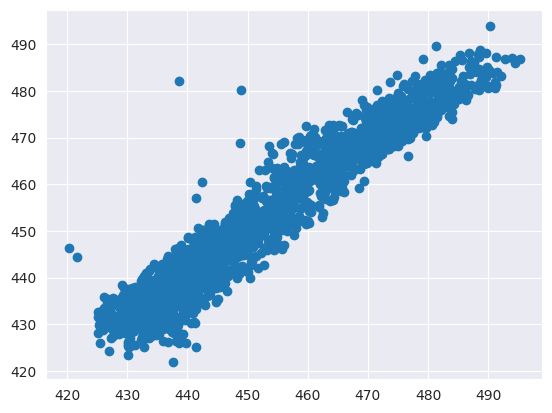

In [ ]:
#plot on predtion
plt.scatter(y_test, y_predict_rg)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

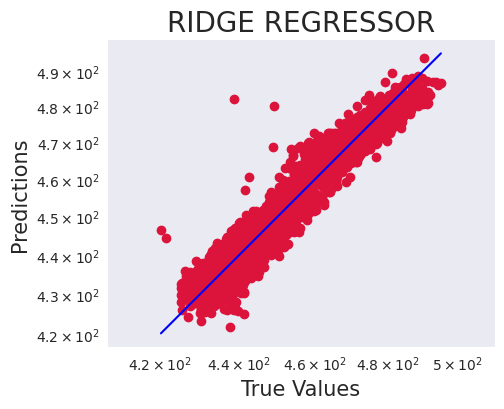

In [ ]:

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_rg, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_rg), max(y_test))
p2 = min(min(y_predict_rg), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("RIDGE REGRESSOR",fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#Testing Accuracy
test_data_model_score=RG.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.9327180350820679

#Training Accuracy
train_data_model_score=RG.score(x_train,y_train)
print ('Accuarcy of train data',round(train_data_model_score,4))
#score of train data 0.9273093296060364


Accuracy of test data 0.9199
Accuarcy of train data 0.9307


Mean Absolute Error


In [ ]:
from sklearn.metrics import mean_absolute_error
mae7=mean_absolute_error(y_test, y_predict_rg)
print("Mean Absolute Error",round(mae7,4))

Mean Absolute Error 3.6875


Mean Squared Error


In [ ]:
from sklearn.metrics import mean_squared_error
mse7=mean_squared_error(y_test, y_predict_rg)
print("Mean Squared Error",round(mse7,4))

Mean Squared Error 22.1685


Root mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
rmse7=np.sqrt(mean_squared_error(y_test, y_predict_rg))
print("Root Mean Squared Error",round(rmse7,4))

Root Mean Squared Error 4.7083


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle7=np.sqrt(mean_squared_log_error(y_test, y_predict_rg))
print("Root Mean Squared log Error",round(rmsle7,4))

Root Mean Squared log Error 0.0104


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score7= r2_score(y_predict_rg,y_test)*100
print("Ridge Regressor R-Squared",round(r2score7,4))

Ridge Regressor R-Squared 91.5711


#8) LASSO REGRESSOR


In [ ]:

LSR = Lasso(alpha=4)
LSR.fit(x_train,y_train)


Lasso(alpha=4)

In [ ]:
#for predict the test values
y_predict_lsr=LSR.predict(x_test)
y_predict_lsr

array([433.3106478 , 456.37610556, 450.32445092, ..., 452.9637396 ,
       455.45235248, 469.25192852])

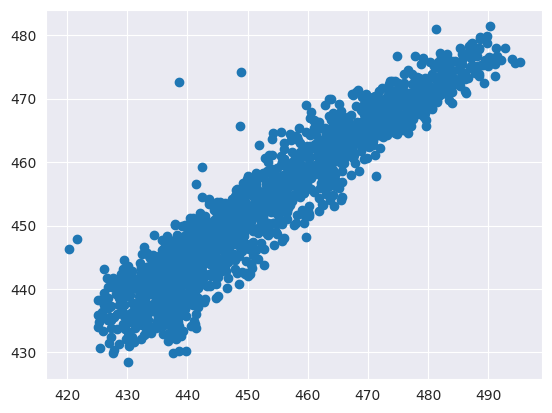

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_lsr)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

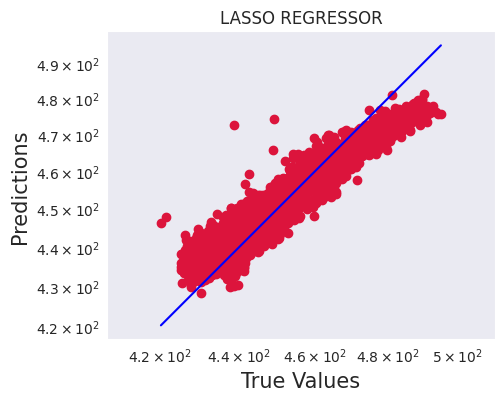

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_lsr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_lsr), max(y_test))
p2 = min(min(y_predict_lsr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LASSO REGRESSOR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [ ]:
#testing Accuracy
test_data_model_score=LSR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data 0.8507

#Training Accuracy
train_data_model_score=LSR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.8542

Accuracy of test data 0.8549
Accuracy of train data 0.8594


Mean Absolute Error


In [ ]:
from sklearn.metrics import mean_absolute_error
mae8=mean_absolute_error(y_test, y_predict_lsr)
print("Mean Absolute Error:",round(mae8,4))

Mean Absolute Error: 5.1567


Mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
mse8=mean_squared_error(y_test, y_predict_lsr)
print("Mean squared Error:",round(mse8,4))


Mean squared Error: 40.1636


Root mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
rmse8=np.sqrt(mean_squared_error(y_test, y_predict_lsr))
print("Root Mean squared Error:",round(rmse8,4))

Root Mean squared Error: 6.3375


Root mean squared log error


In [ ]:
from sklearn.metrics import mean_squared_log_error
rmsle8=np.sqrt(mean_squared_log_error(y_test, y_predict_lsr))
print("Root Mean squared log Error:",round(rmsle8,4))


Root Mean squared log Error: 0.0139


R-Squared


In [ ]:
from sklearn.metrics import r2_score
r2score8= r2_score(y_predict_lsr,y_test)*100
print("Lasso regressor R-Squared:",round(r2score8,4))


Lasso regressor R-Squared: 72.689


#9)KNN Regressor


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, p=2) # k =5 # p=2 --> Eucledian distance
knn.fit(x_train,y_train)


KNeighborsRegressor()

In [ ]:
#for predict the test values
y_predict_knn=knn.predict(x_test)
y_predict_knn

array([432.188, 464.22 , 450.466, ..., 449.148, 448.438, 477.83 ])

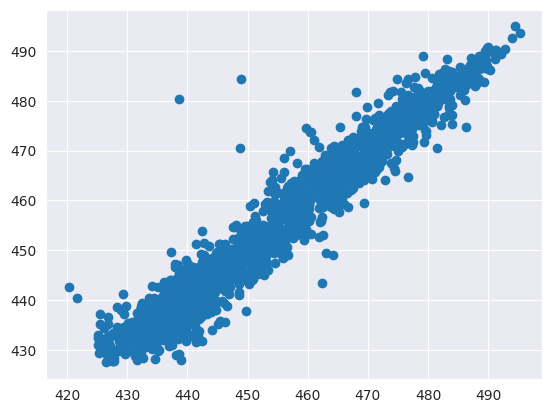

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_knn)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

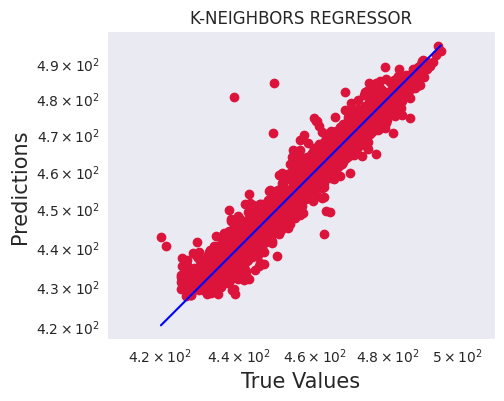

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_knn, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_knn), max(y_test))
p2 = min(min(y_predict_knn), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('K-NEIGHBORS REGRESSOR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing score
test_data_model_score=knn.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data  0.9520063526324694

train_data_model_score=knn.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))
#score of train data 0.9638290944489041


Accuracy of test data 0.945
Accuracy of train data 0.9694


Mean Absolute Error


In [ ]:
# mean_absolute_error
mae9=mean_absolute_error(y_test, y_predict_knn)
print("Mean Absolute error:",round(mae9,4))


Mean Absolute error: 2.7866


Mean squared error


In [ ]:
mse9=mean_squared_error(y_test, y_predict_knn)
print("Mean Squared error:",round(mse9,4))


Mean Squared error: 15.2134


Root mean squared error


In [ ]:
#for root mean squared error
rmse9=np.sqrt(mean_squared_error(y_test, y_predict_knn))
print("Root Mean Squared error:",round(rmse9,4))


Root Mean Squared error: 3.9004


Root mean squared log error


In [ ]:
#root mean squared  log error
rmsle9=np.sqrt(mean_squared_log_error(y_test, y_predict_knn))
print("Root Mean Squared log error:",round(rmsle9,4))


Root Mean Squared log error: 0.0086


R-Squared


In [ ]:
#r2score
r2score9= r2_score(y_predict_knn,y_test)*100
print("K-Neighbors R-Squared:",round(r2score9,4))#94.9918734120857


K-Neighbors R-Squared: 94.3703


#10) ADA BOOST REGRESSOR


In [ ]:
AB = AdaBoostRegressor(base_estimator=DTR,n_estimators=100)
AB.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                  n_estimators=100)

In [ ]:
#for predict the test values
y_predict_ab=knn.predict(x_test)
y_predict_ab


array([432.188, 464.22 , 450.466, ..., 449.148, 448.438, 477.83 ])

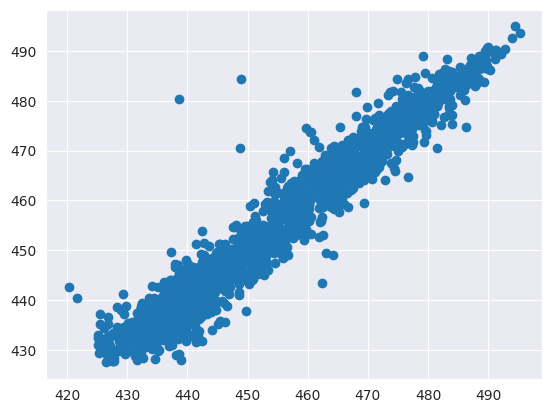

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_ab)
plt.show()


(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

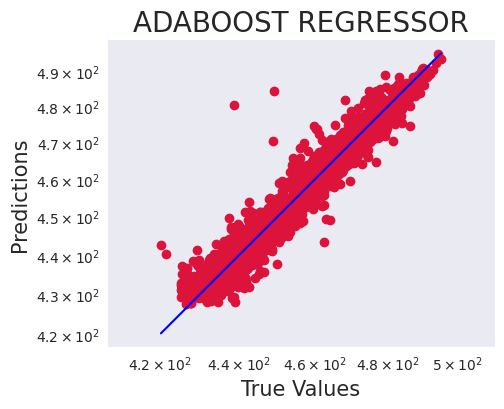

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_ab, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_ab), max(y_test))
p2 = min(min(y_predict_ab), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('ADABOOST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing score
test_data_model_score=AB.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data  0.9641628433325322

train_data_model_score=AB.score(x_train,y_train)
print ('Accuracy of test data',round(train_data_model_score,4))
#score of train data score of test data 0.9999302115876435


Accuracy of test data 0.9579
Accuracy of test data 0.9999


Mean absolute error


In [ ]:

# mean_absolute_error
mae10=mean_absolute_error(y_test, y_predict_ab)
print("Mean Absolute Error:",round(mae10,4))


Mean Absolute Error: 2.7866


Mean Squared Error


In [ ]:
#for mean squared error
mse10=mean_squared_error(y_test, y_predict_ab)
print("Mean squared Error:",round(mse10,4))


Mean squared Error: 15.2134


Root Mean Squared Error


In [ ]:
#for root mean squared error
rmse10=np.sqrt(mean_squared_error(y_test, y_predict_ab))
print("Root Mean squared Error:",round(rmse10,4))


Root Mean squared Error: 3.9004


Root Mean Squared Log Error


In [ ]:
#root mean squared  log error
rmsle10=np.sqrt(mean_squared_log_error(y_test, y_predict_ab))
print("Root Mean squared log Error:",round(rmsle10,4))

Root Mean squared log Error: 0.0086


R-Squared

In [ ]:
#r2score
r2score10= r2_score(y_predict_ab,y_test)*100
print("AdaBoost Regerssor R-Squared:",round(r2score10,4))


AdaBoost Regerssor R-Squared: 94.3703


#11.**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
LogReg = LogisticRegression()






In [ ]:
x_train

array([[ 1.0277352 ,  1.08868711, -1.26784743, -1.54587273],
       [-1.94190399, -1.10455268, -0.40735691,  0.57063727],
       [ 0.73117385,  1.22640399,  0.36388508,  0.85626338],
       ...,
       [ 0.3312857 , -0.38685096,  1.10144837, -0.03280781],
       [ 0.61040226,  0.78885777, -0.35515495,  0.74804054],
       [-1.97142593, -1.17301765, -1.62989334,  1.29531934]])

In [ ]:
y_train

6629    437.83
3000    489.10
624     434.98
9140    449.48
4429    443.24
         ...  
9372    494.75
7291    462.01
1344    451.00
7293    442.78
1289    486.09
Name: energy_production, Length: 7654, dtype: float64

In [ ]:
#for predict the test values
y_predict_LogReg=knn.predict(x_test)
y_predict_LogReg

array([432.188, 464.22 , 450.466, ..., 449.148, 448.438, 477.83 ])

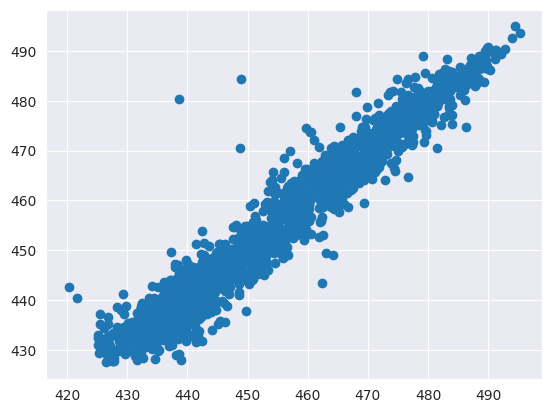

In [ ]:
#plot on prdtion
plt.scatter(y_test, y_predict_LogReg)
plt.show()



(416.8257004899652, 499.2901213993411, 416.8257004899652, 499.2901213993411)

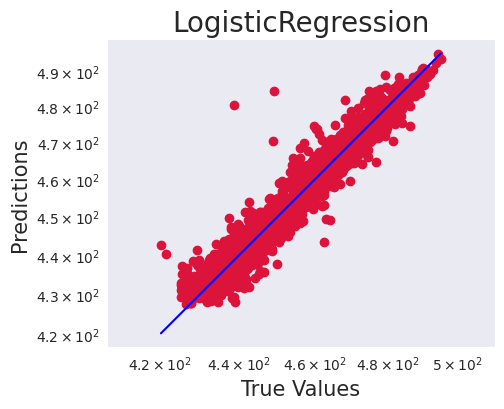

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_ab, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_ab), max(y_test))
p2 = min(min(y_predict_ab), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LogisticRegression',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')


In [ ]:
#testing score
test_data_model_score=AB.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))
#score of test data  0.9641628433325322

train_data_model_score=AB.score(x_train,y_train)
print ('Accuracy of test data',round(train_data_model_score,4))
#score of train data score of test data 0.9999302115876435


Accuracy of test data 0.9579
Accuracy of test data 0.9999


Mean absolute error


In [ ]:
# mean_absolute_error
mae11=mean_absolute_error(y_test, y_predict_LogReg)
print("Mean Absolute Error:",round(mae11,4))


Mean Absolute Error: 2.7866


Mean Squared Error


In [ ]:
mas11=mean_absolute_error(y_test, y_predict_LogReg)
print("Mean Squared Error:",round(mas11,4))


Mean Squared Error: 2.7866


Root Mean Squared Error


In [ ]:
#for root mean squared error
rmse11=np.sqrt(mean_squared_error(y_test, y_predict_LogReg))
print("Root Mean squared Error:",round(rmse11,4))


Root Mean squared Error: 3.9004


Root Mean Squared Log Error


In [ ]:
#root mean squared  log error
rmsle11=np.sqrt(mean_squared_log_error(y_test, y_predict_LogReg))
print("Root Mean squared log Error:",round(rmsle11,4))


Root Mean squared log Error: 0.0086


R-Squared

In [ ]:
#r2score
r2score11= r2_score(y_predict_LogReg,y_test)*100
print("LogisticRegression:",round(r2score11,4))


LogisticRegression: 94.3703


#12)Neural Networks



In [ ]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=4,  activation='relu')) #input layer
model.add(Dense(1, activation='relu')) #output layer


In [ ]:
# Compile model
model.compile(loss='msle', optimizer='adam', metrics=['msle'])

# loss --> Regression --> mean square error
# loss --> multi class --> categorical_cross entropy


In [ ]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=150)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#output:loss: 1.2283e-04 - msle: 1.2283e-04
#msle: 0.01%


Epoch 1/500
43/43 [==============================] - 2s 11ms/step - loss: 37.4559 - msle: 37.4559 - val_loss: 37.4704 - val_msle: 37.4704
Epoch 2/500
43/43 [==============================] - 0s 4ms/step - loss: 37.4559 - msle: 37.4559 - val_loss: 37.4704 - val_msle: 37.4704
Epoch 3/500
43/43 [==============================] - 0s 3ms/step - loss: 37.4559 - msle: 37.4559 - val_loss: 37.4704 - val_msle: 37.4704
Epoch 4/500
43/43 [==============================] - 0s 3ms/step - loss: 37.4559 - msle: 37.4559 - val_loss: 37.4704 - val_msle: 37.4704
Epoch 5/500
43/43 [==============================] - 0s 3ms/step - loss: 37.4559 - msle: 37.4559 - val_loss: 37.4704 - val_msle: 37.4704
Epoch 6/500
43/43 [==============================] - 0s 4ms/step - loss: 37.4559 - msle: 37.4559 - val_loss: 37.4704 - val_msle: 37.4704
Epoch 7/500
43/43 [==============================] - 0s 4ms/step - loss: 37.4559 - msle: 37.4559 - val_loss: 37.4704 - val_msle: 37.4704
Epoch 8/500
43/43 [=====================

In [ ]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'msle', 'val_loss', 'val_msle'])

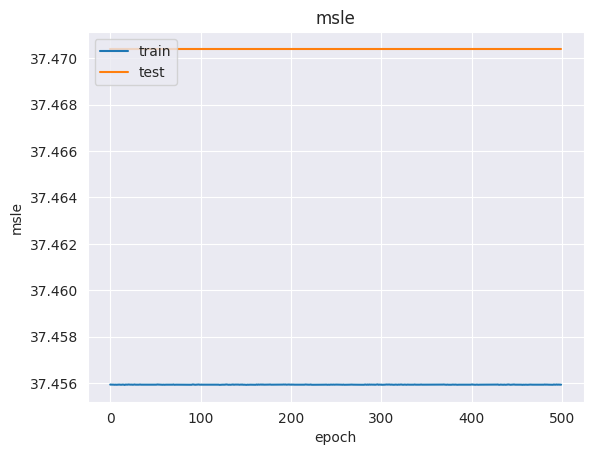

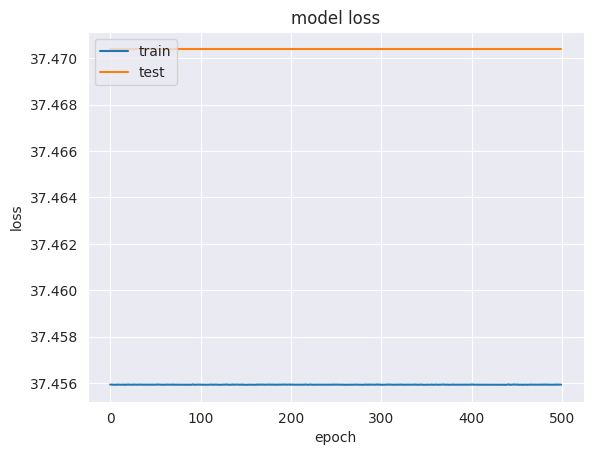

In [ ]:
# summarize history for accuracy
plt.plot(history.history['msle'])
plt.plot(history.history['val_msle'])
plt.title('msle')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
RESULTS=pd.DataFrame(data)
RESULTS
RESULTS.sort_values(['RMSE','R2SCORES'])


Model      RMSE   R2SCORES       MAE     RMSLE  \
5                XGB_Regressor  3.419237  95.669925  2.308823  0.007519   
2       RandomForest_Regressor  3.510005  95.412670  2.432175  0.007715   
8         KNeighbors_Regressor  3.900438  94.370265  2.786614  0.008596   
9           AdaBoost_Regressor  3.900438  94.370265  2.786614  0.008596   
10          LogisticRegression  3.900438  94.370265  2.786614  0.008596   
3   Gradientboosting_regressor  4.025290  93.827740  3.017459  0.008843   
1       DecisionTree_Regressor  4.562994  92.595296  3.158725  0.010029   
6              Ridge_regressor  4.708339  91.571136  3.687528  0.010381   
0             LinearRegression  4.708341  91.571148  3.687528  0.010381   
4      supportvector_regressor  4.742523  91.785314  3.694628  0.010473   
7              Lasso_regressor  6.337475  72.688999  5.156697  0.013857   

          MSE  
5   11.691180  
2   12.320135  
8   15.213415  
9   15.213415  
10   2.786614  
3   16.202963  
1   20.820910  
6   22.168453  
0   22.168471  
4   22.491528  
7   40.163587

In [ ]:
import pickle


In [ ]:
from pickle import dump


In [ ]:
with open("model_xgb.pkl",'wb') as f:
    pickle.dump(y_predict_xgb,f)


In [ ]:
from pickle import load



In [ ]:
loaded_model=load(open('model_xgb.pkl','rb'))
loaded_model


array([430.5687 , 463.45334, 451.55292, ..., 453.23306, 454.6845 ,
       478.63837], dtype=float32)